In [ ]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
current = os.path.dirname(os.path.realpath('Plot.ipynb'))
parent = os.path.dirname(current)
sys.path.append(parent + "\\Functions\\")
import UsefulFunctions as UF
import PlottingFunctions as PF
root = UF.DataRoot(2)



def SignalPlotPP(df, pat, fts, title, savepath, col_wrap_num, wrap_by):
   '''
   Given a df, patient and selected ft array, plots the signal for the given features
   Per Patient
   '''
   
   df_pat = df[df['PatID'] == pat]
   df_pat = df_pat[df_pat['Feature'].isin(fts)]
   print(df_pat.head())
   df_pat["Fraction"] = df_pat["Fraction"].astype(int)
   fractions = df_pat["Fraction"].unique()

   plt.figure(figsize=(20, 10))
   g = sns.FacetGrid(df_pat, col="Feature", col_wrap=col_wrap_num, aspect=1.5)
   g.fig.subplots_adjust(top=0.9)
   g.fig.suptitle("{} - {}".format(title, str(pat)))
   g.map(sns.scatterplot, x=df_pat["Fraction"], y=df_pat["FeatureChange"], hue=df_pat["Feature"])
   g.map(sns.lineplot, x=df_pat["Fraction"], y=df_pat["FeatureChange"],hue=df_pat["Feature"])
   g.set_axis_labels("Fraction", "Feature Change")
   g.set_titles("{col_name}")
   
df_ft = pd.read_csv(root + "\Aaron\ProstateMRL\Data\Paper1\Longitudinal\Clustering\SelectedFeatures.csv")
df_vals = pd.read_csv(root + "\Aaron\ProstateMRL\Data\Paper1\Features\All_fts_change.csv")

fts = df_ft['Feature'].unique()
PatIDs = df['PatID'].unique()

savepath = root + "\Aaron\ProstateMRL\Data\Paper1\Plots\Signal\\"


print(fts)
for pat in PatIDs:
    SignalPlotPP(df, pat, fts, "Cluster Features", savepath, 5, "Feature")


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

root = "E:\\"
df_selected = pd.read_csv(root + "Aaron\\ProstateMRL\\Data\\Paper1\\Longitudinal\\Clustering\\SelectedFeatures.csv")
df_all = pd.read_csv(root + "Aaron\\ProstateMRL\\Data\\Paper1\\Features\\All_fts_change.csv")


fts_s = df_selected['Feature'].unique()

df_vals = df_all[df_all['Feature'].isin(fts_s)]
# sort by PatID and Fraction
df_vals = df_vals.sort_values(by=['PatID', 'Fraction'])
# rescale feature values based on value at Fraction 1 for each feature
df_vals['FeatureValueRS'] = df_vals.groupby(['PatID', 'Feature'])['FeatureValue'].apply(lambda x: x/x.iloc[0])
df_vals["FeatureChangeRS"] = df_vals.groupby(['PatID', 'Feature'])['FeatureChange'].apply(lambda x: x/x.iloc[0])

PatIDs = df_vals['PatID'].unique()[0:2]


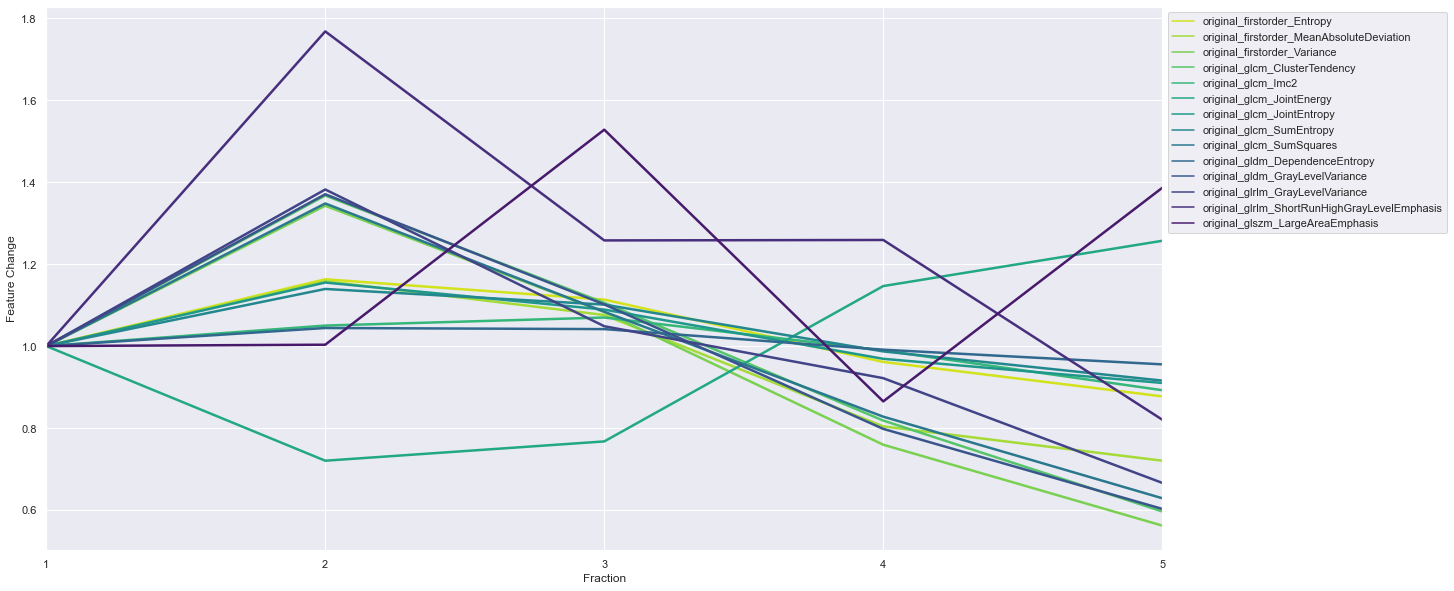

<Figure size 432x288 with 0 Axes>

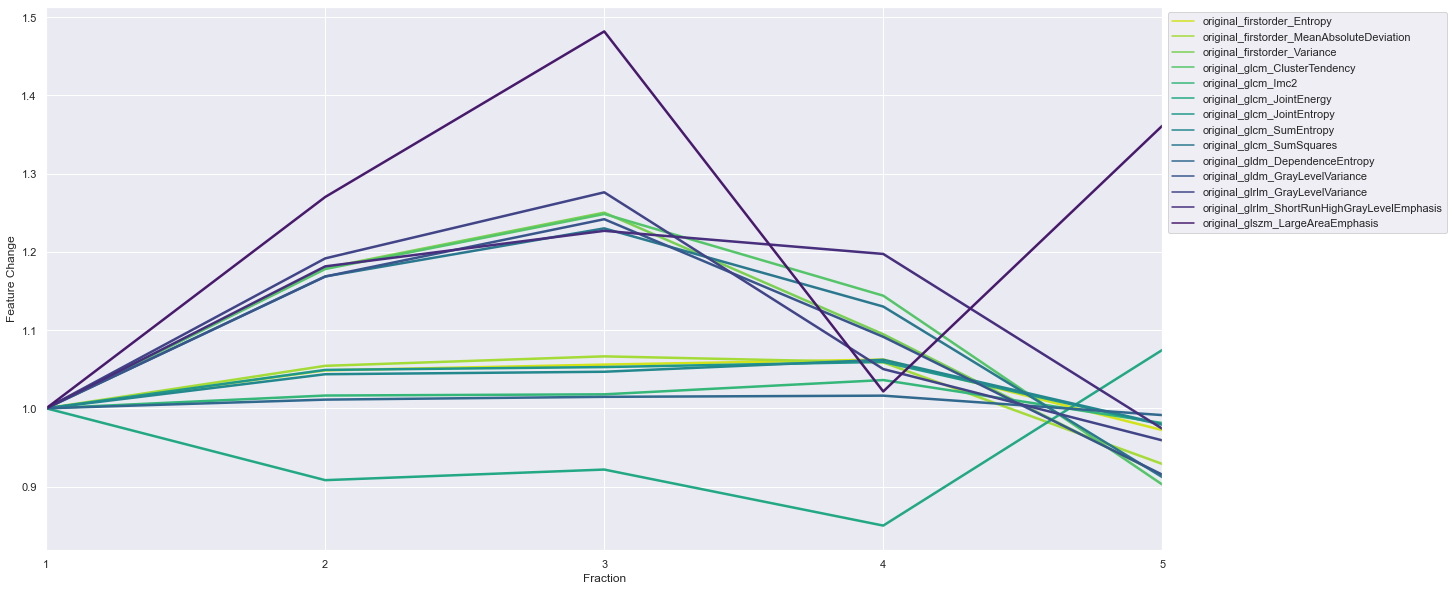

<Figure size 432x288 with 0 Axes>

In [40]:
for pat in PatIDs[0:2]:
    sns.set(style="darkgrid")
    plt.figure(figsize=(20, 10))
    ax = sns.lineplot(x="Fraction", y="FeatureValueRS", hue="Feature", data=df_vals.query('PatID == @pat'), palette="viridis_r", linewidth=2.5, ci=None)
    ax.set_xlim(1,5)
    ax.set_xticks([1,2,3,4,5])
    ax.set(xlabel='Fraction', ylabel='Feature Change')
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()
    plt.clf()

<bound method NDFrame.head of       Unnamed: 0  PatID  Scan  Days  Fraction                  Feature  \
0              0   1029   MR1     0         1  firstorder_90Percentile   
1              1   1029   MR6     3         2  firstorder_90Percentile   
2              2   1029   MR9     5         3  firstorder_90Percentile   
3              3   1029  MR14     7         4  firstorder_90Percentile   
4              4   1029  MR17    10         5  firstorder_90Percentile   
...          ...    ...   ...   ...       ...                      ...   
4503         191    955  MR22    10         4       glszm_ZoneVariance   
4504         192    955   MR1     0         1           shape_Flatness   
4505         193    955   MR6     3         2           shape_Flatness   
4506         194    955  MR16     7         3           shape_Flatness   
4507         195    955  MR22    10         4           shape_Flatness   

       FeatureValue  FeatureChange  Cluster  Selected  
0        117.000000      

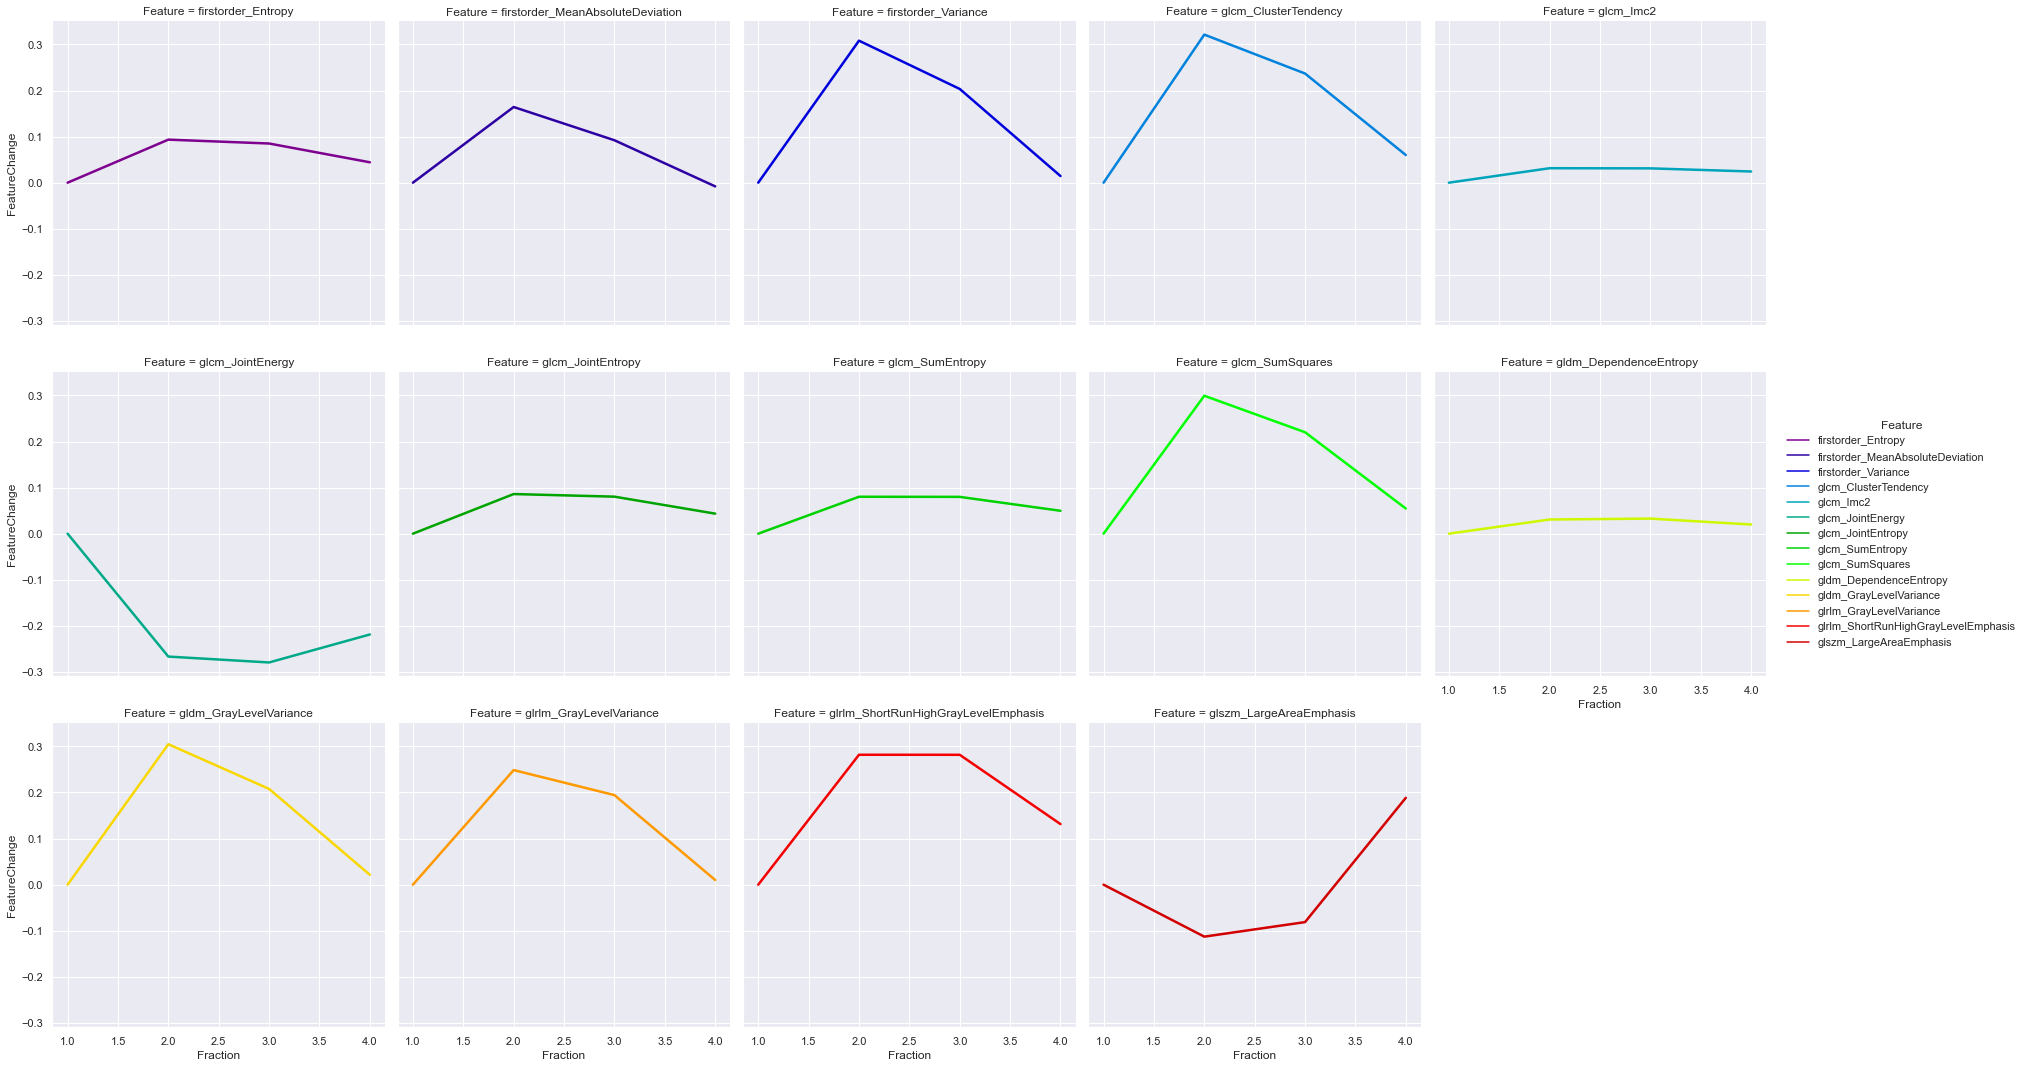

In [30]:
import os


csv_dir = "E:\\Aaron\\ProstateMRL\\Data\\Paper1\\Longitudinal\\Clustering\\Labels\\"
csv_files = os.listdir(csv_dir)


df = pd.DataFrame()
# open all csv files in the directory
for file in csv_files:
    # read in and append to df
    df_t = pd.read_csv(csv_dir + file)
    df = df.append(df_t, ignore_index=True)


# create new column selected if feature is in selected features
df["Selected"] = df["Feature"].isin(fts_s)
# remove original from featurename
df["Feature"] = df["Feature"].str.replace("original_", "")
#print(df.query('Selected == True'))
print(df.head)
df = df.sort_values(by=['PatID', 'Fraction'])
# rescale feature values based on value at Fraction 1 for each feature
df['FeatureValueRS'] = df.groupby(['PatID', 'Feature'])['FeatureValue'].apply(lambda x: x/x.iloc[0])
df["FeatureChangeRS"] = df.groupby(['PatID', 'Feature'])['FeatureChange'].apply(lambda x: x/x.iloc[0])

# rescale Feature change to be between 0 and 1
df['FeatureChangeRS'] = df.groupby(['PatID', 'Feature'])['FeatureChange'].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

#print(df.head())

# PatIDs = df['PatID'].unique()[0:6]


sns.set(style="darkgrid")
props = dict(boxstyle='round', facecolor='skyblue', alpha=0.5)

for pat in PatIDs:
    g = sns.relplot(data=df.query('Selected == True & PatID == @pat'), x="Fraction", y="FeatureChange",
                    hue="Feature", col="Feature", col_wrap=5, kind="line", 
                    palette="nipy_spectral", linewidth=2.5, ci=None)



    # for c in df["Cluster"].unique():`
#     # only want clusters with more than 3 features
#     if len(df.query('Cluster == @c & Selected == True')['Feature'].unique()) < 3:
#         print(c)
#         print("No : ",df.query('Cluster == @c & Selected == False')['Feature'].unique())
#         print("Yes: ", df.query('Cluster == @c & Selected == True')['Feature'].unique())
        

# for time, ax in g.axes_dict.items():
#     op = df.query('Cluster == @time & Selected == True')['Feature'].unique()
#     op = ",\n".join(op)
#     ax.text(.05, .7, op, transform=ax.transAxes, fontsize=14, bbox=props)
#     print(ax)
#     sns.lineplot(data=df.query('Selected == False & Cluster == @time'), x="Fraction", y="FeatureChangeRS", 
#                 color = "0.7", linewidth=2.5,
#                 ci=None, ax=ax, legend=False,
#                 alpha=0.5)
#     ax.set_xticks([1,2,3,4,5])
#     ax.set_xticklabels([1,2,3,4,5])
#     # make x axis ticks invisible
#     ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

    


# g.set_axis_labels("Fraction", "Feature Change")
# g.set_titles("")
# #g.set(xticks=[1,2,3,4,5])
# #g.set_xticklabels([1,2,3,4,5])
# g.fig.subplots_adjust(top=0.9)
# g.fig.suptitle("Selected Features", fontsize=30)

#     #ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
#     #ax.legend(bbox_to_anchor=(1, 1))
# #sns.relplot(data=df.query('Selected == False'), x="Fraction", y="FeatureChange", hue="Feature", col="Cluster", col_wrap=4, kind="line", color = "0.7", linewidth=2.5, ci=None)


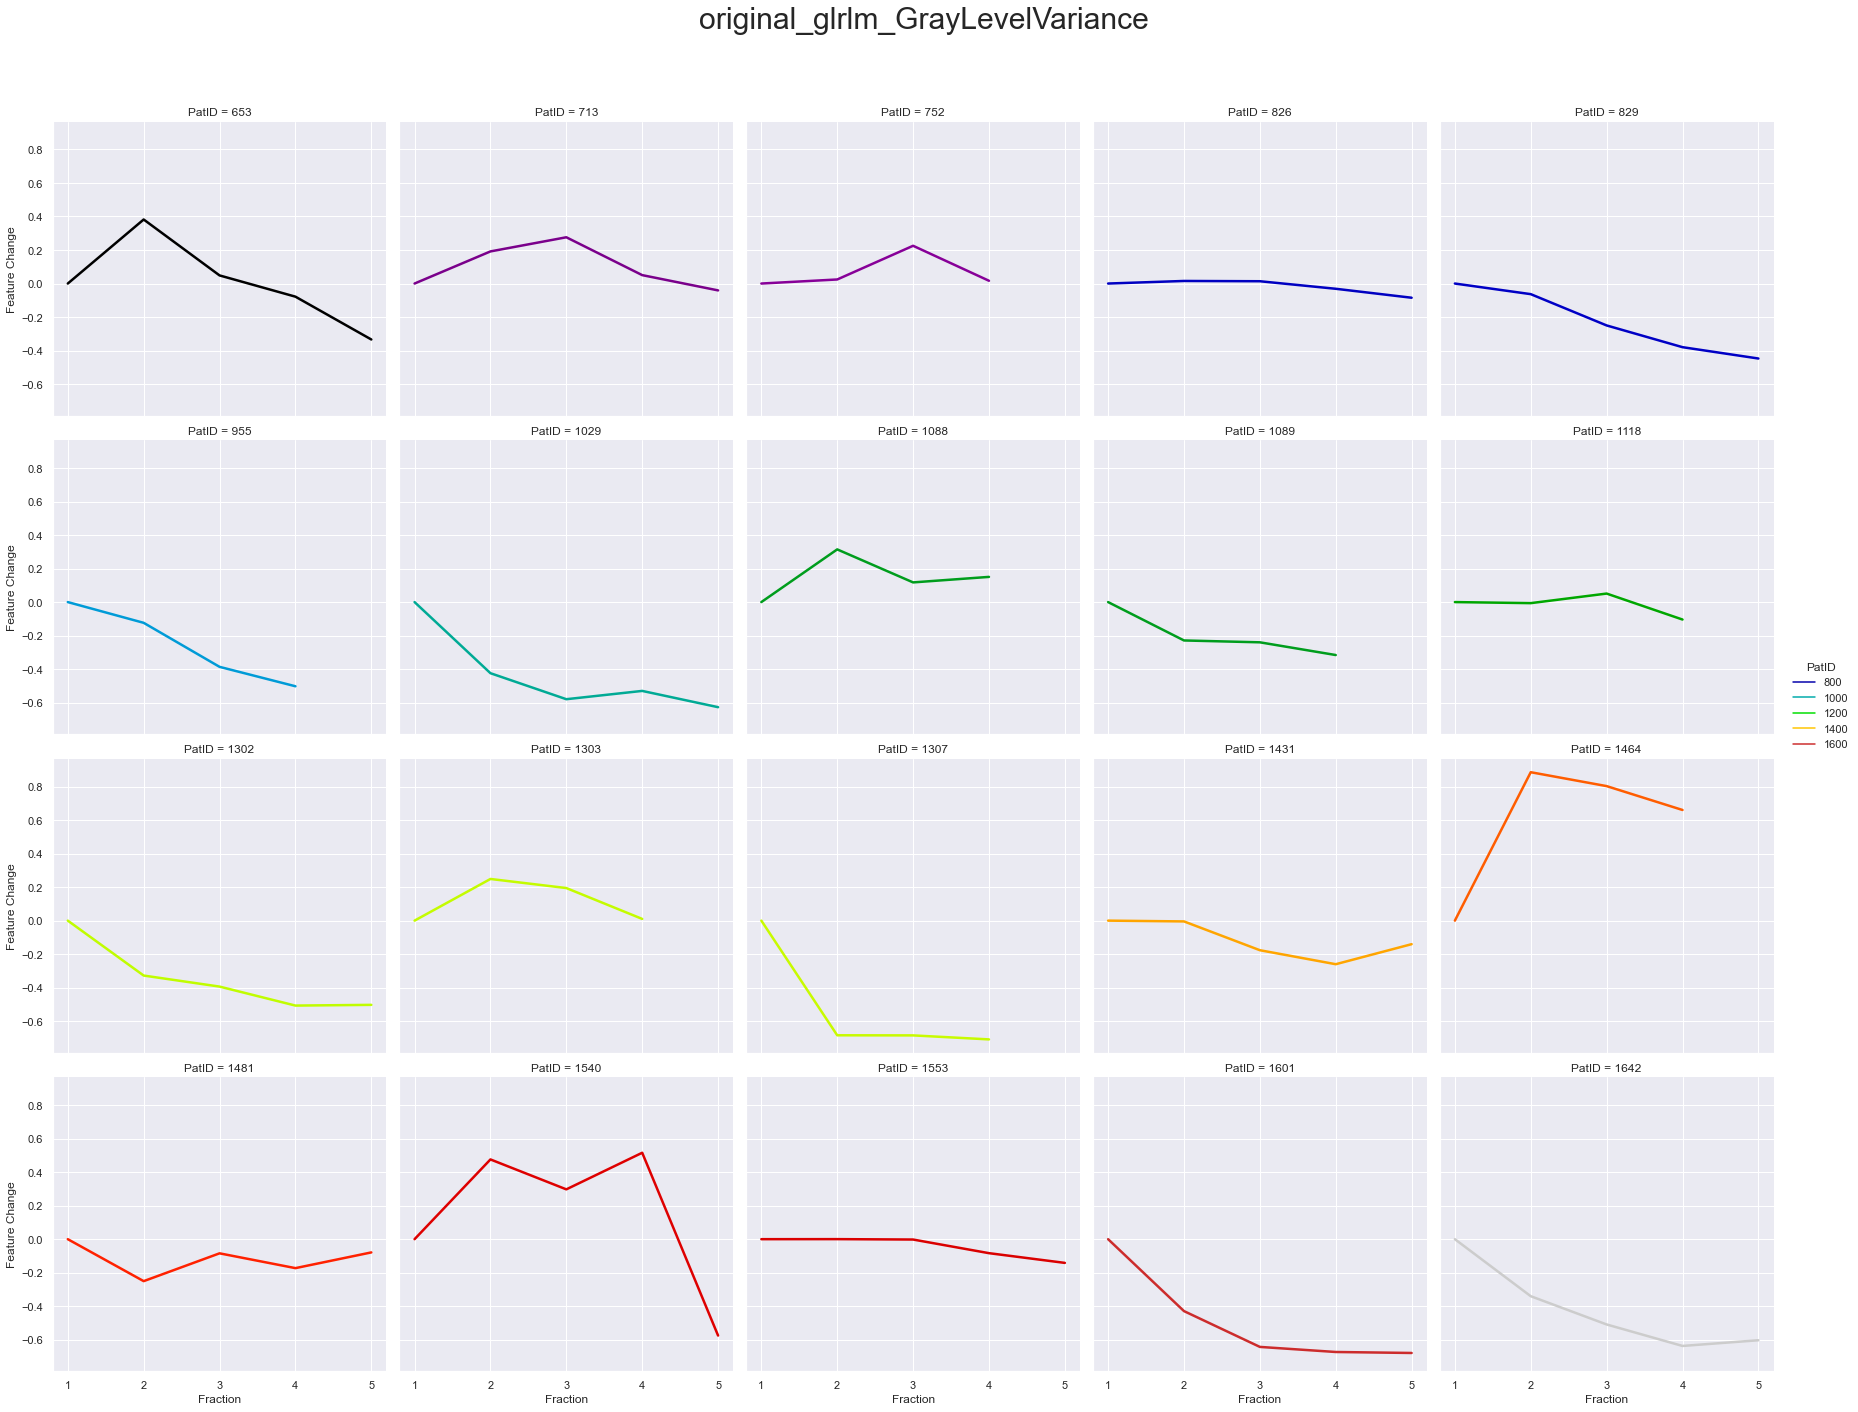

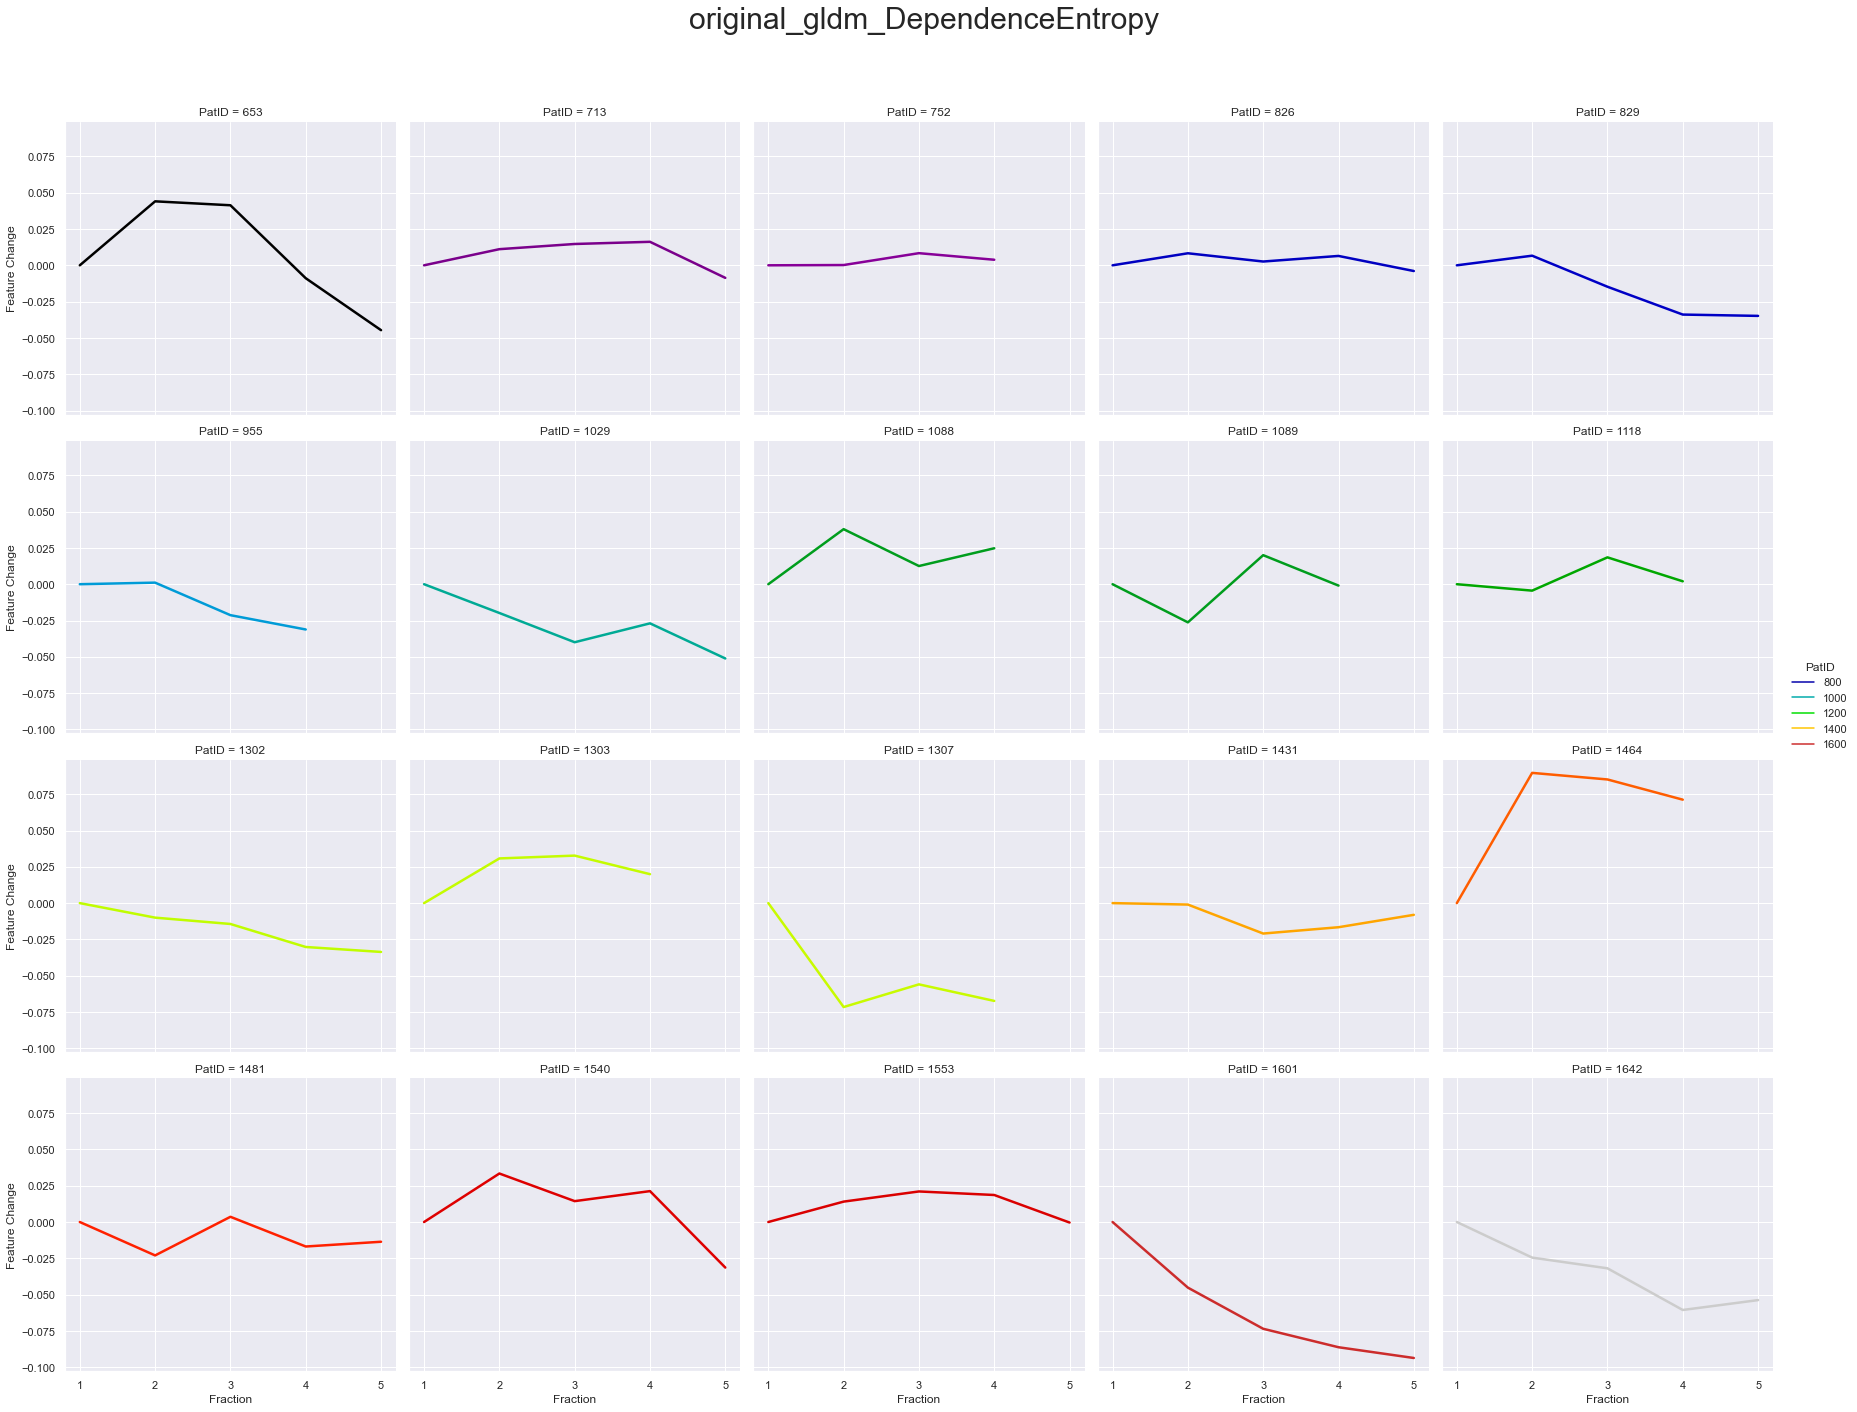

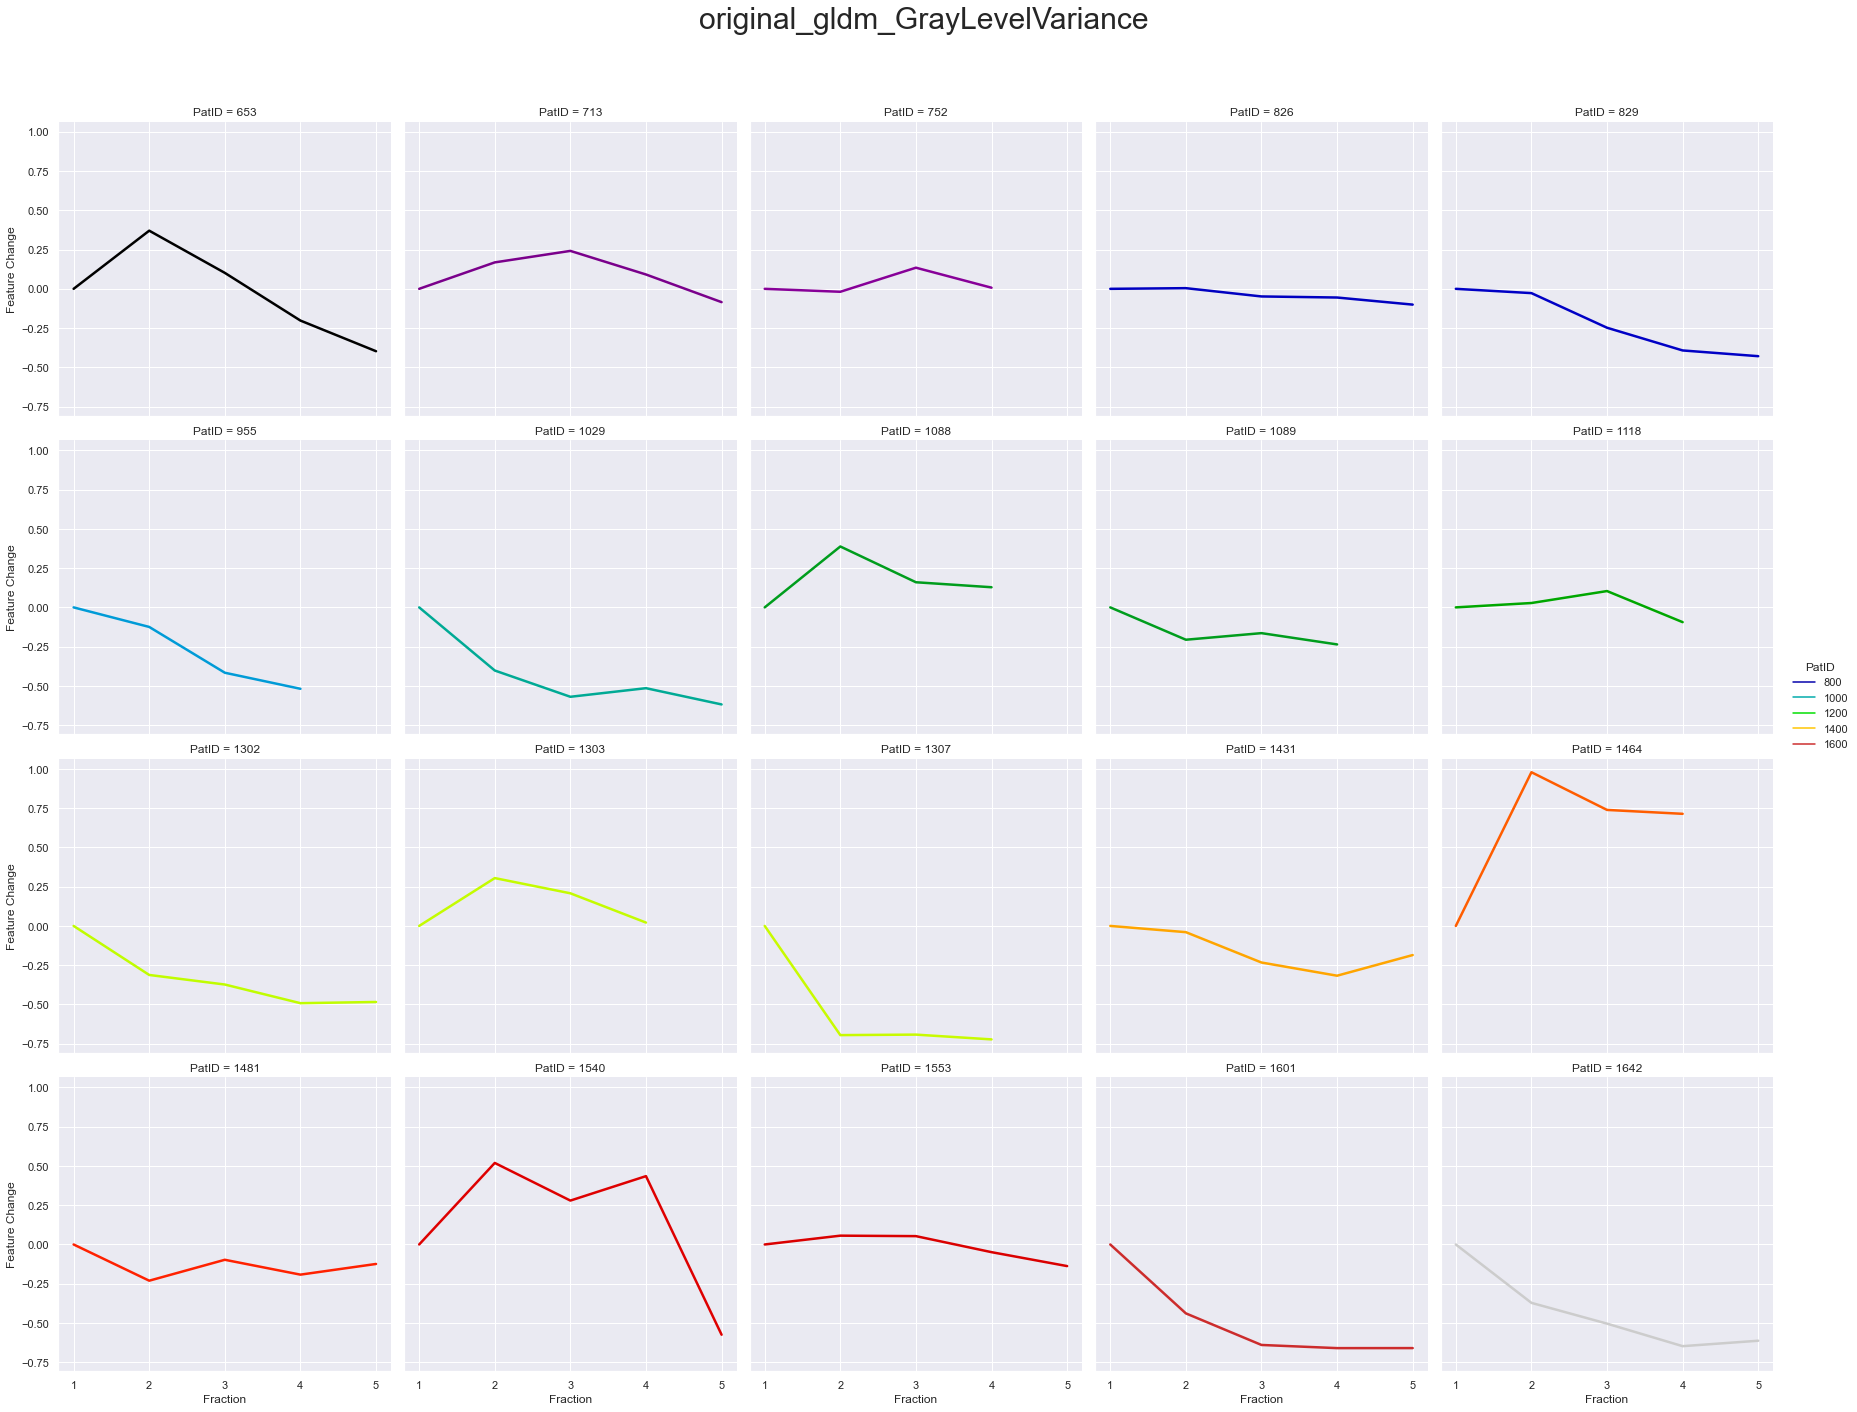

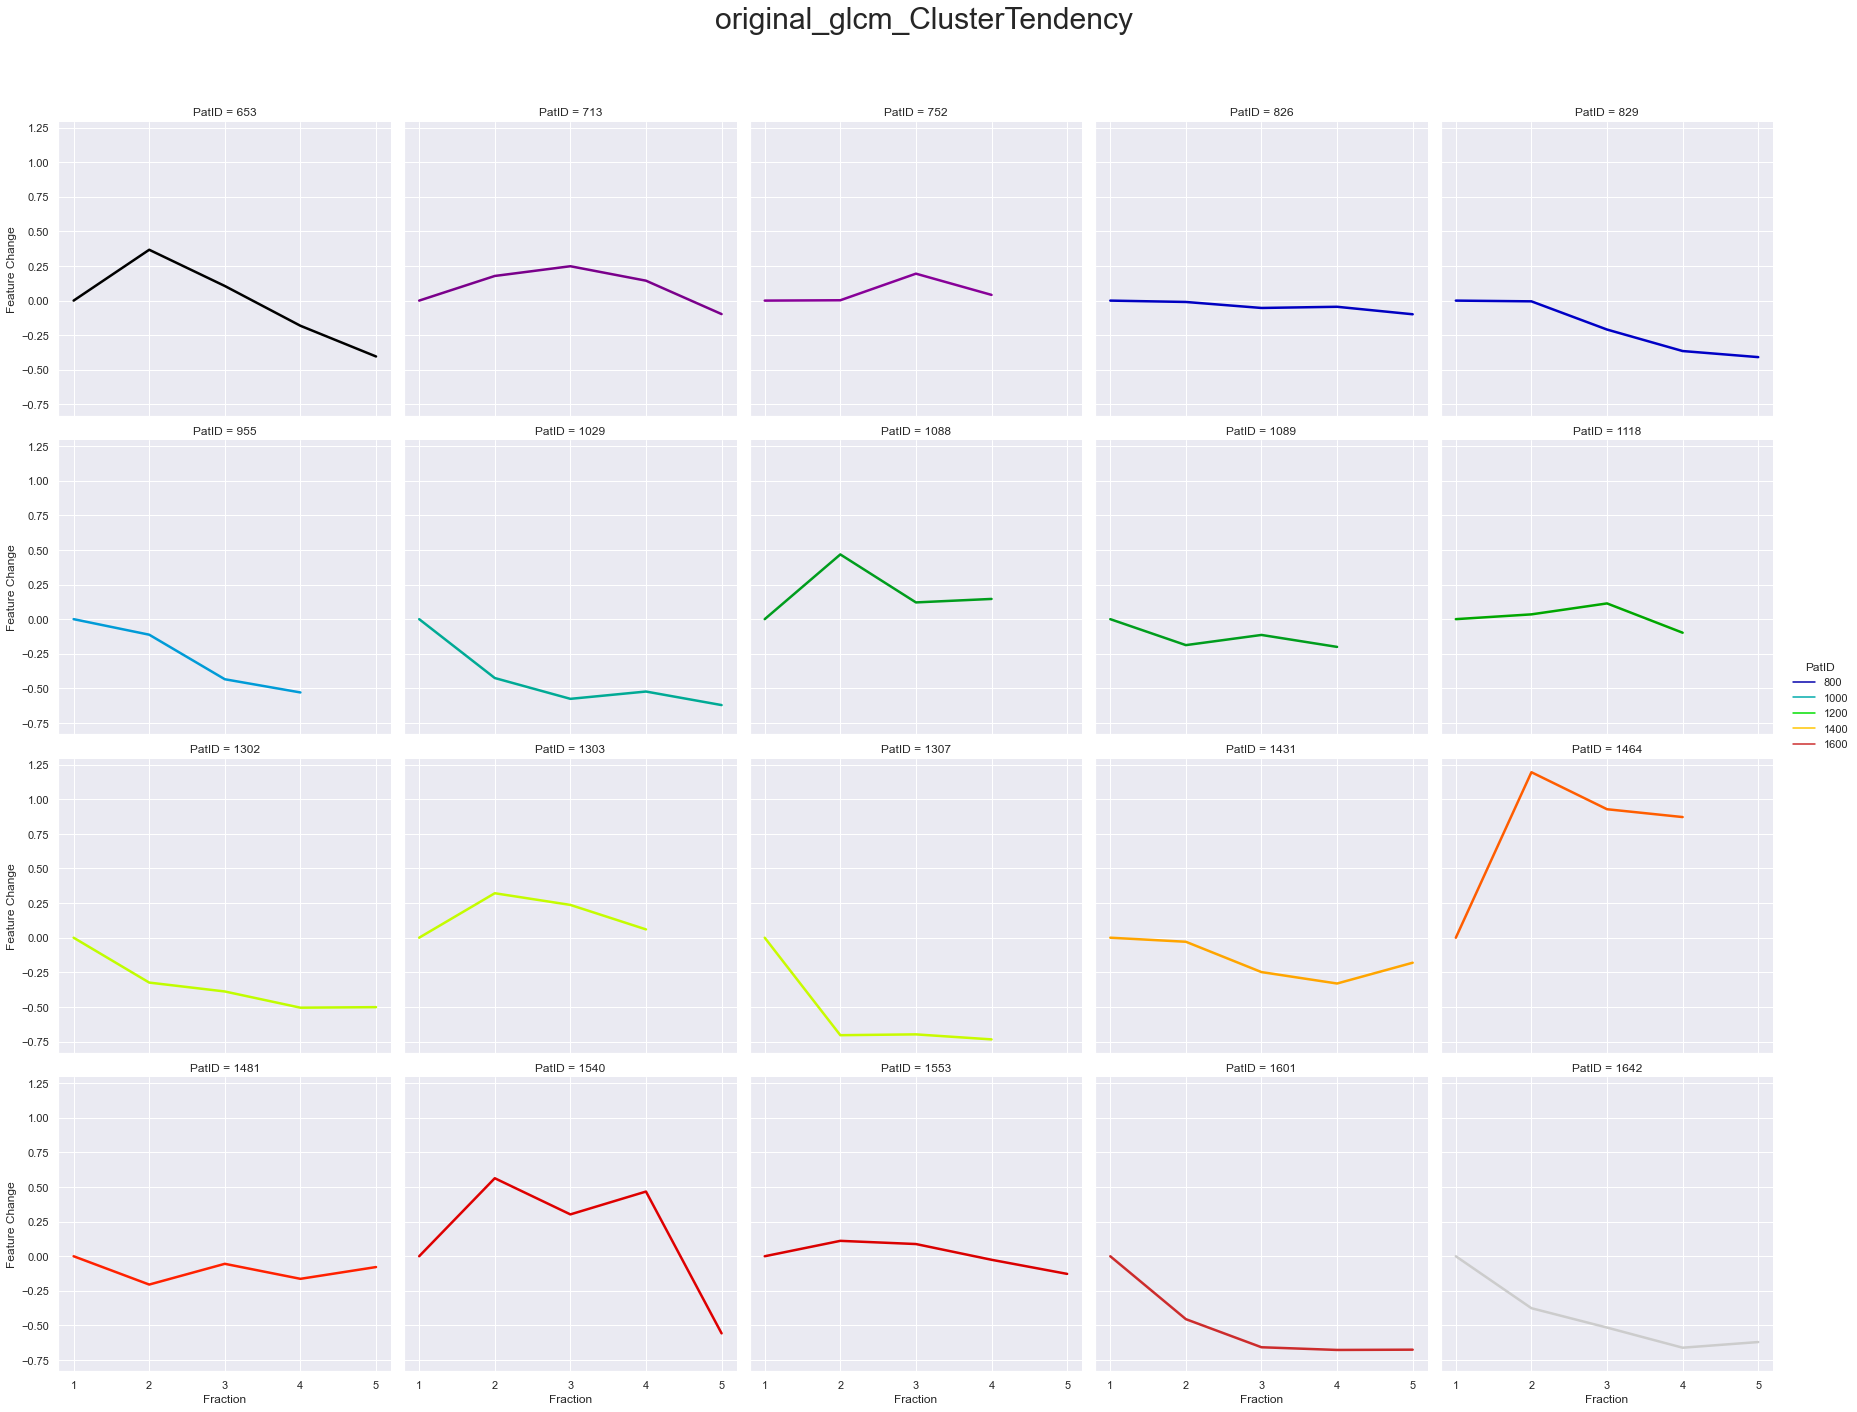

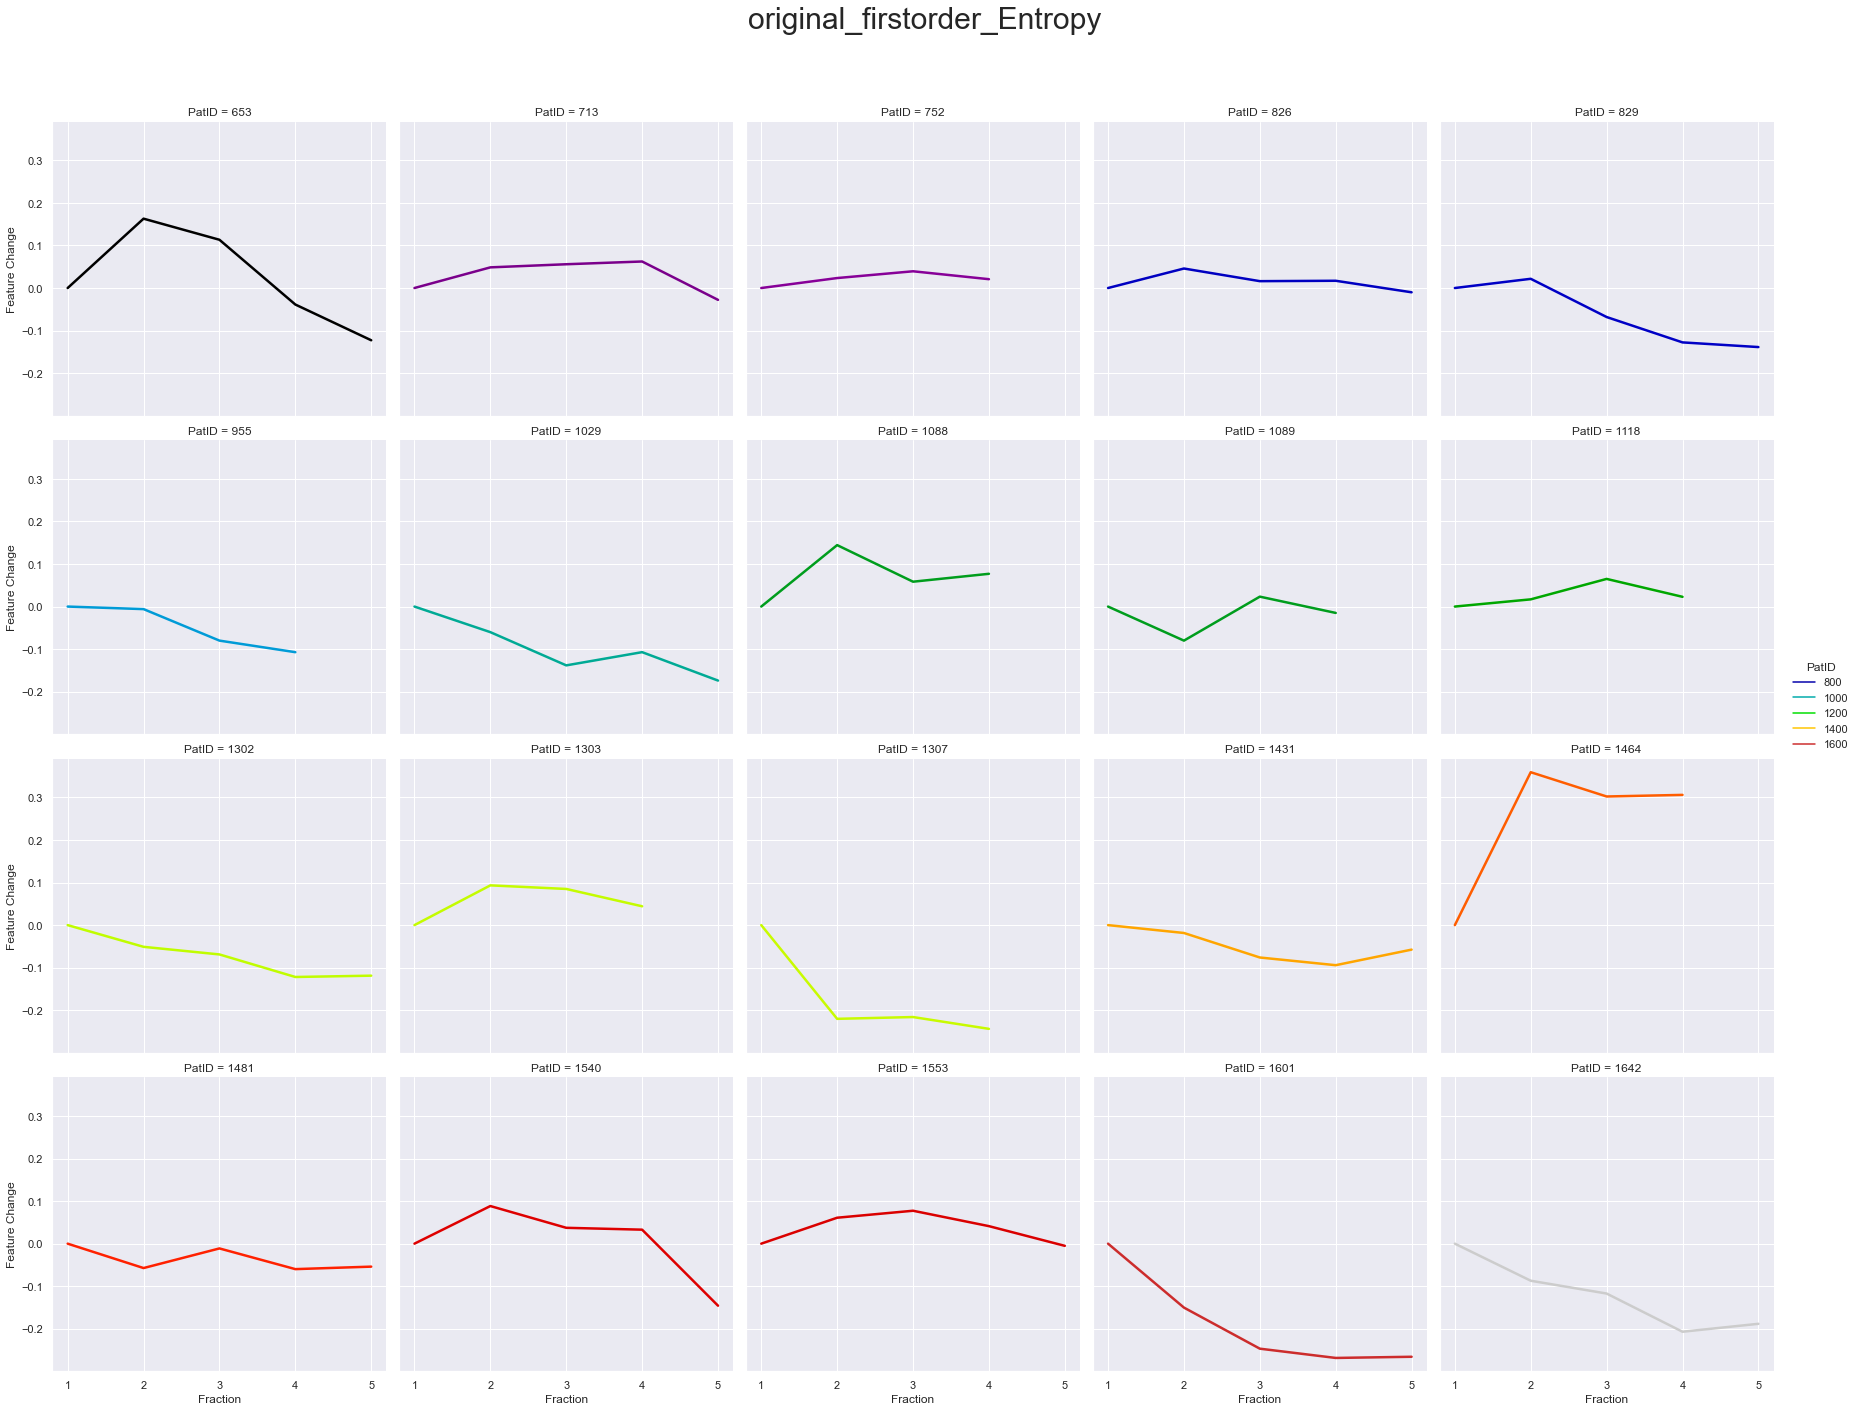

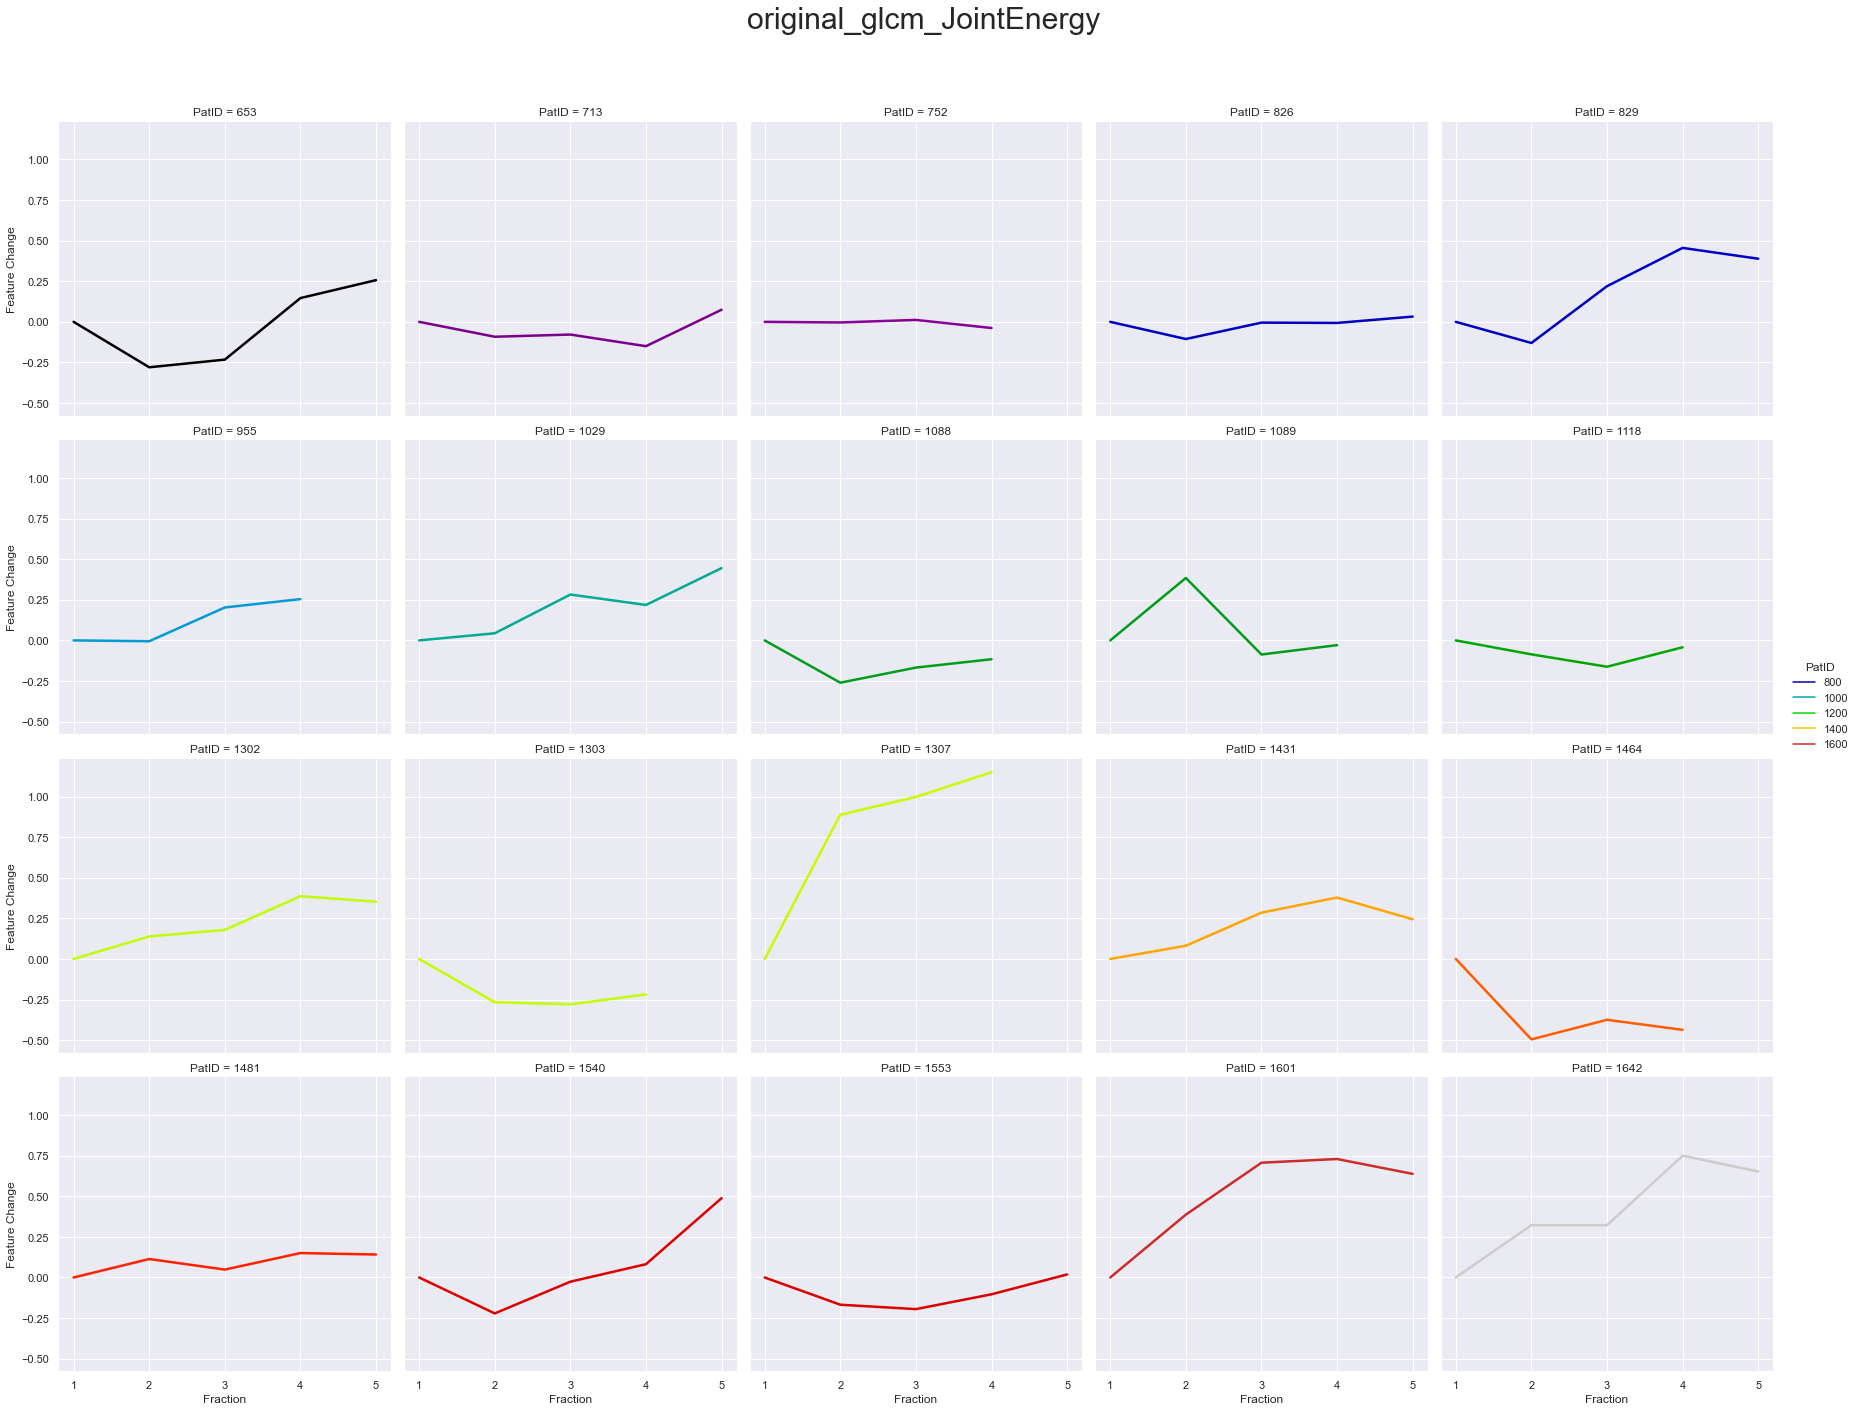

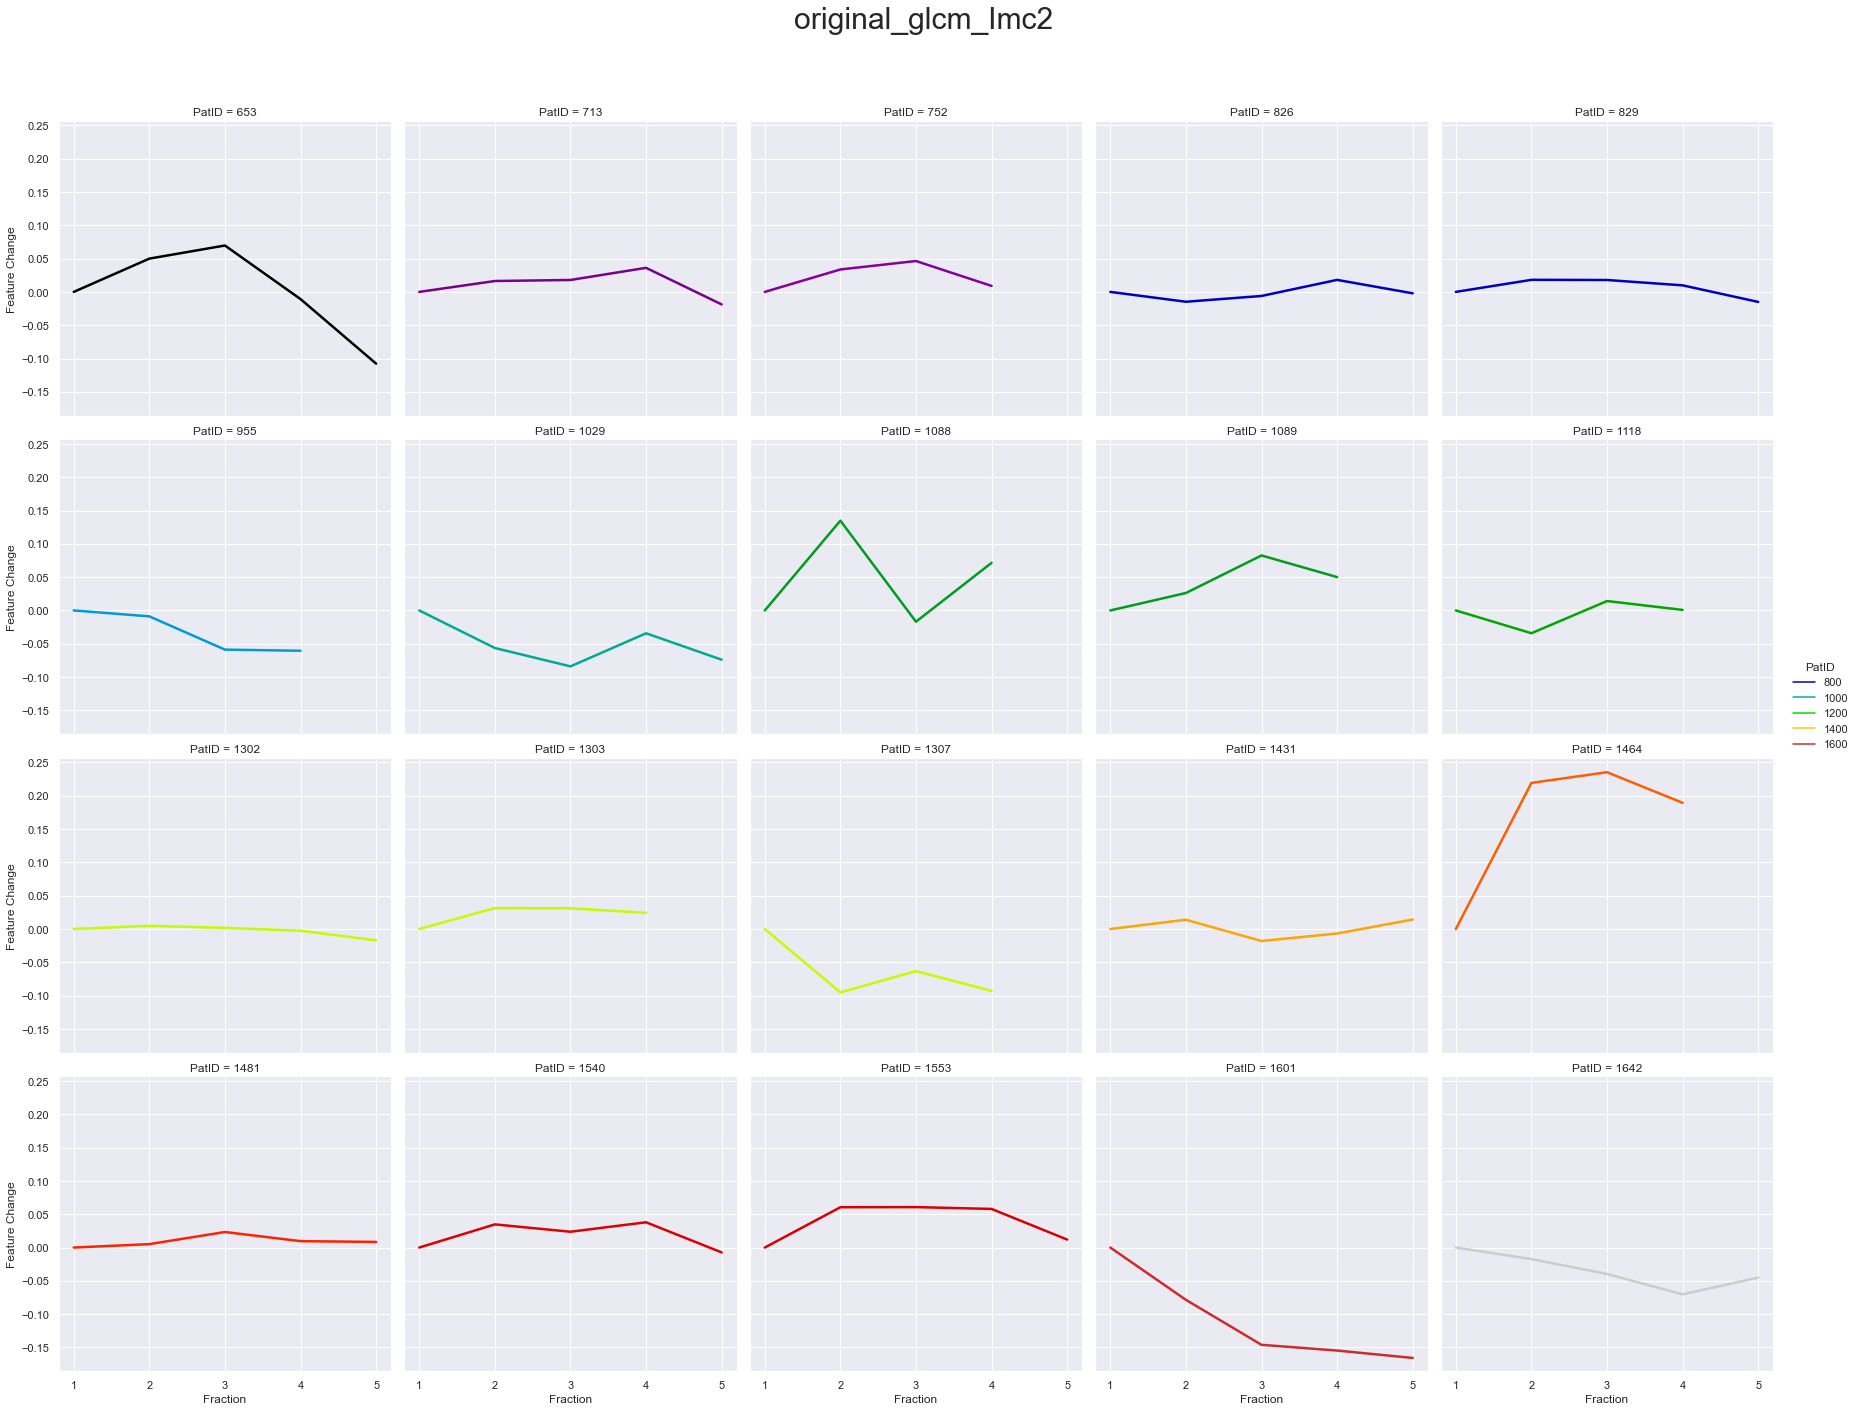

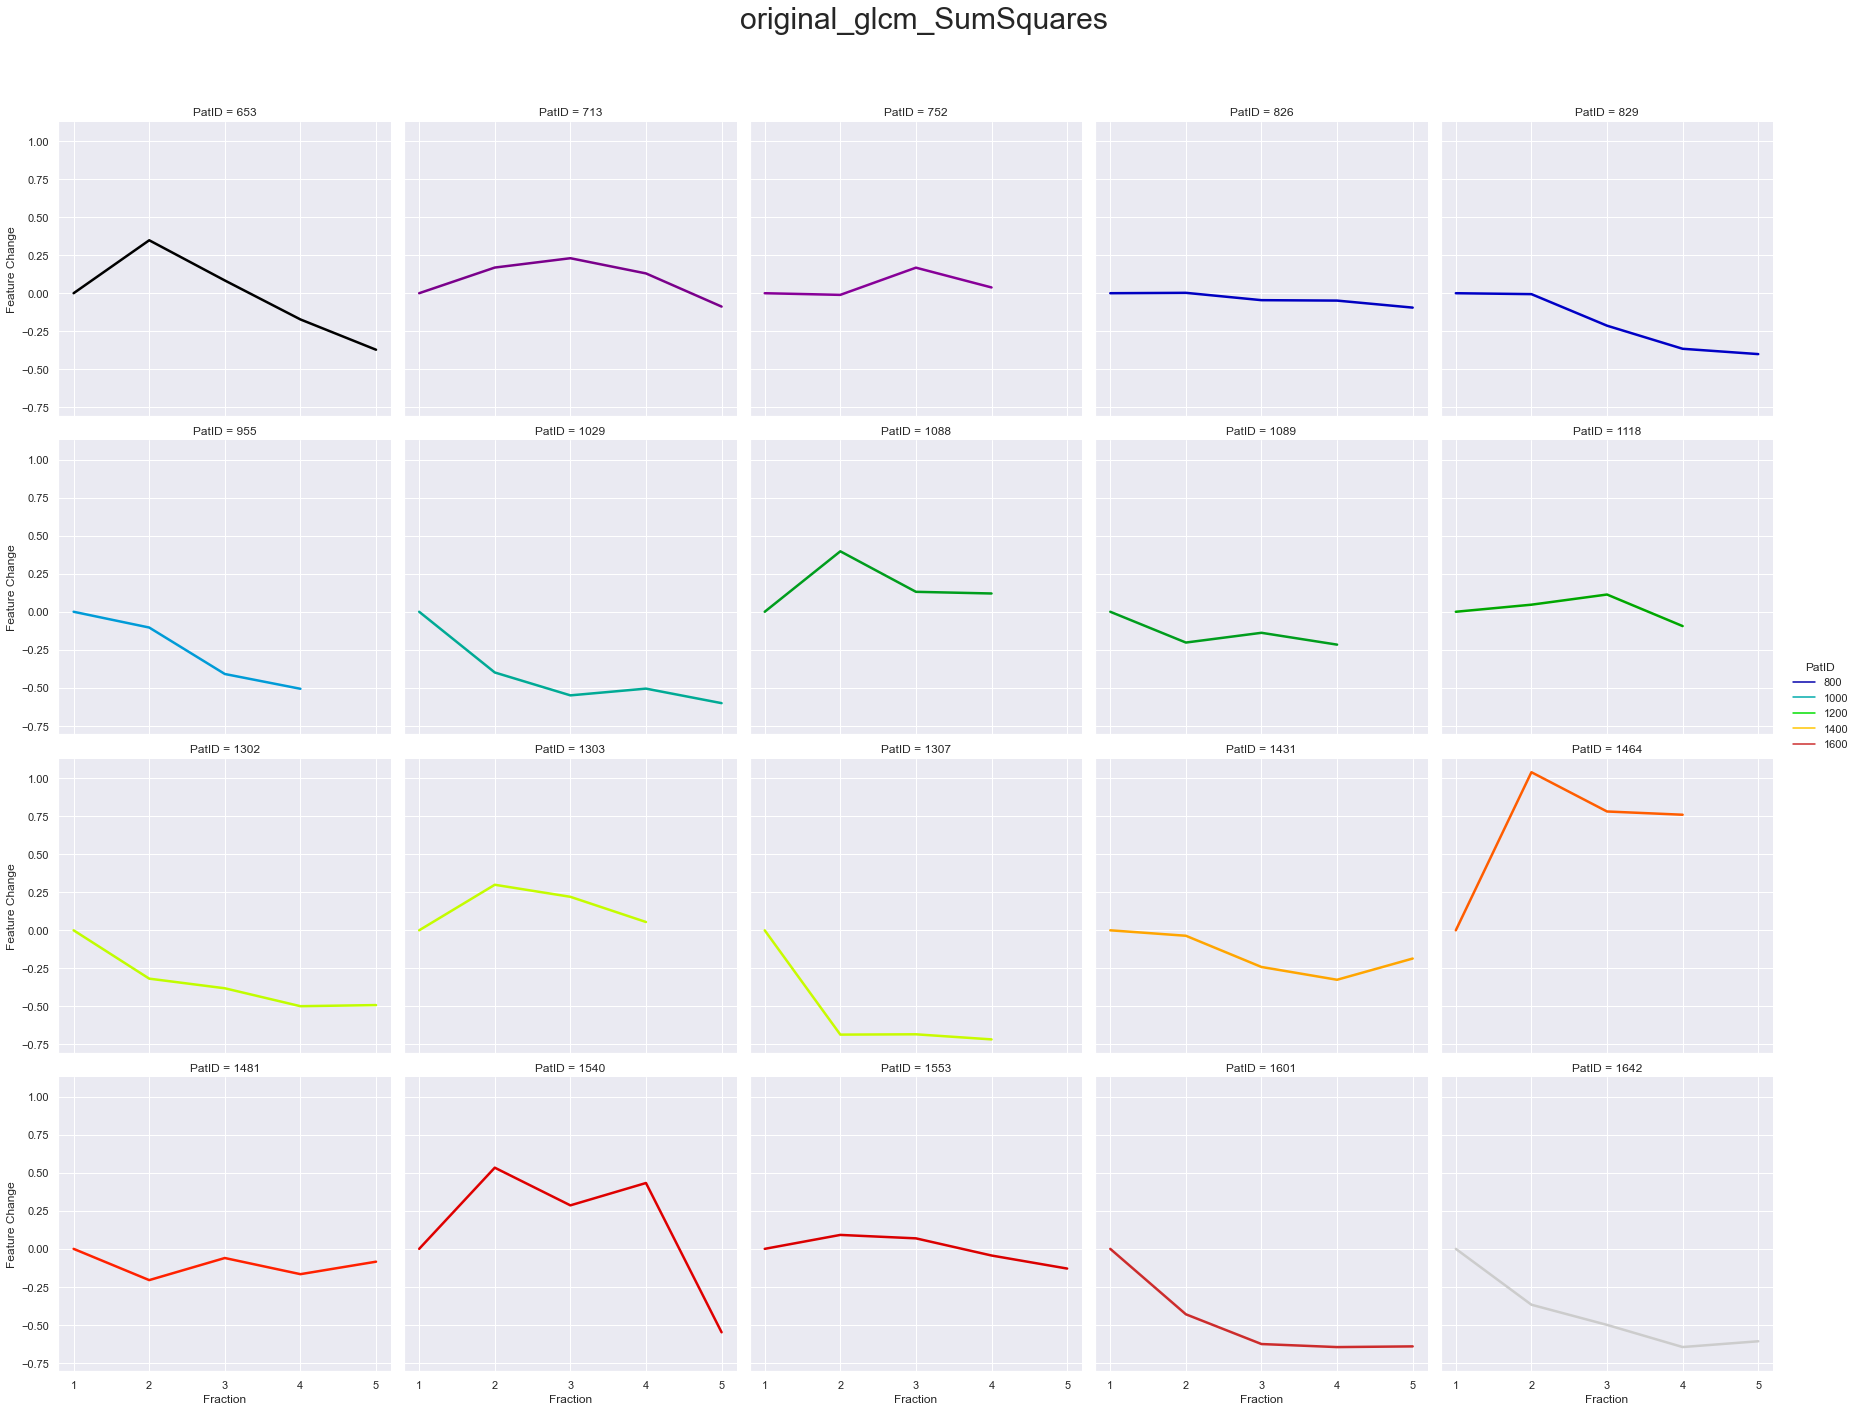

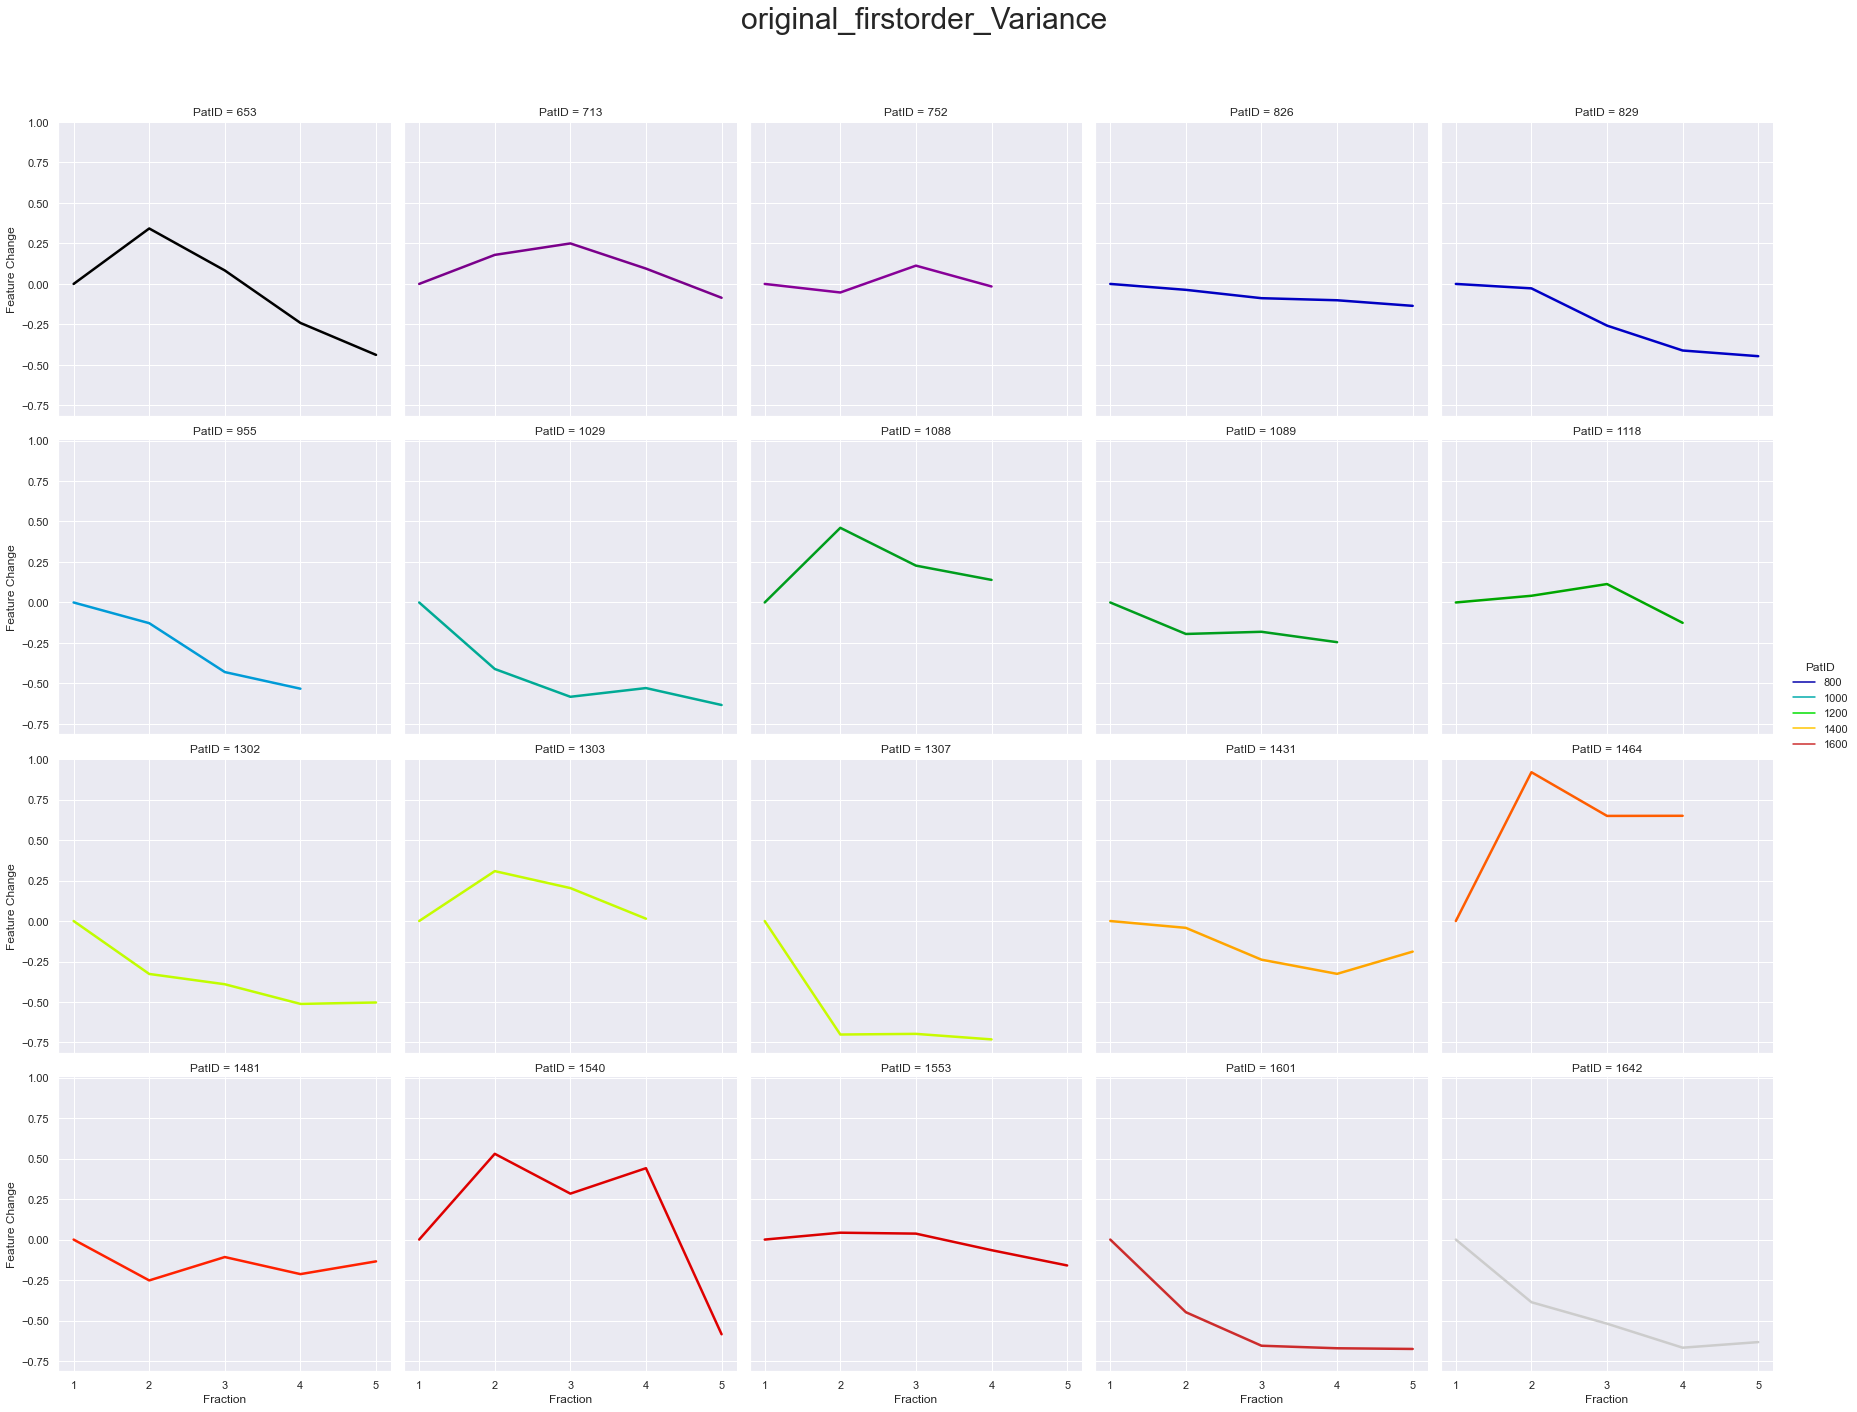

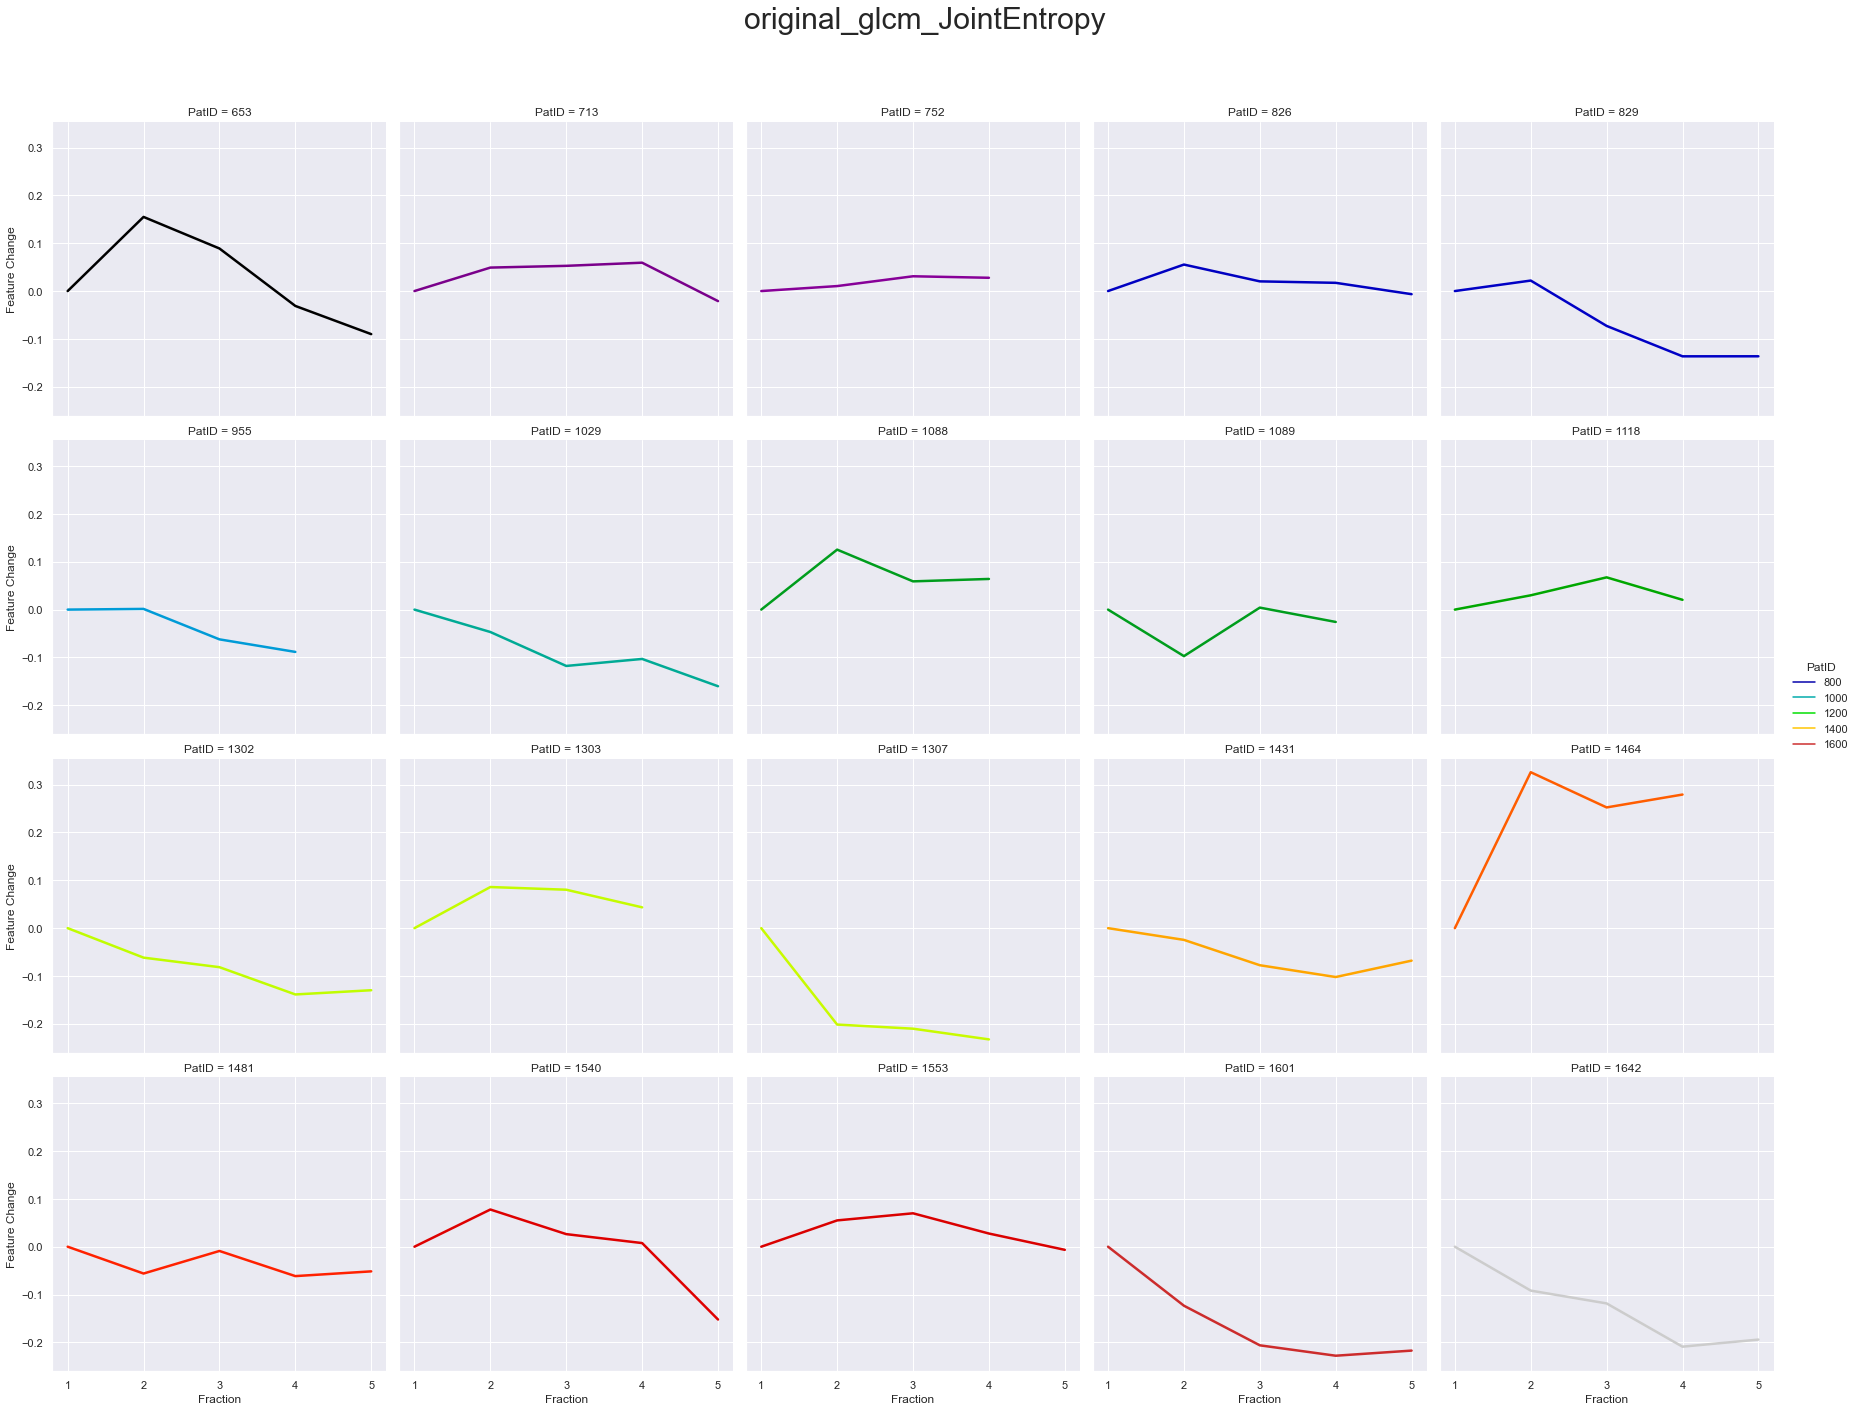

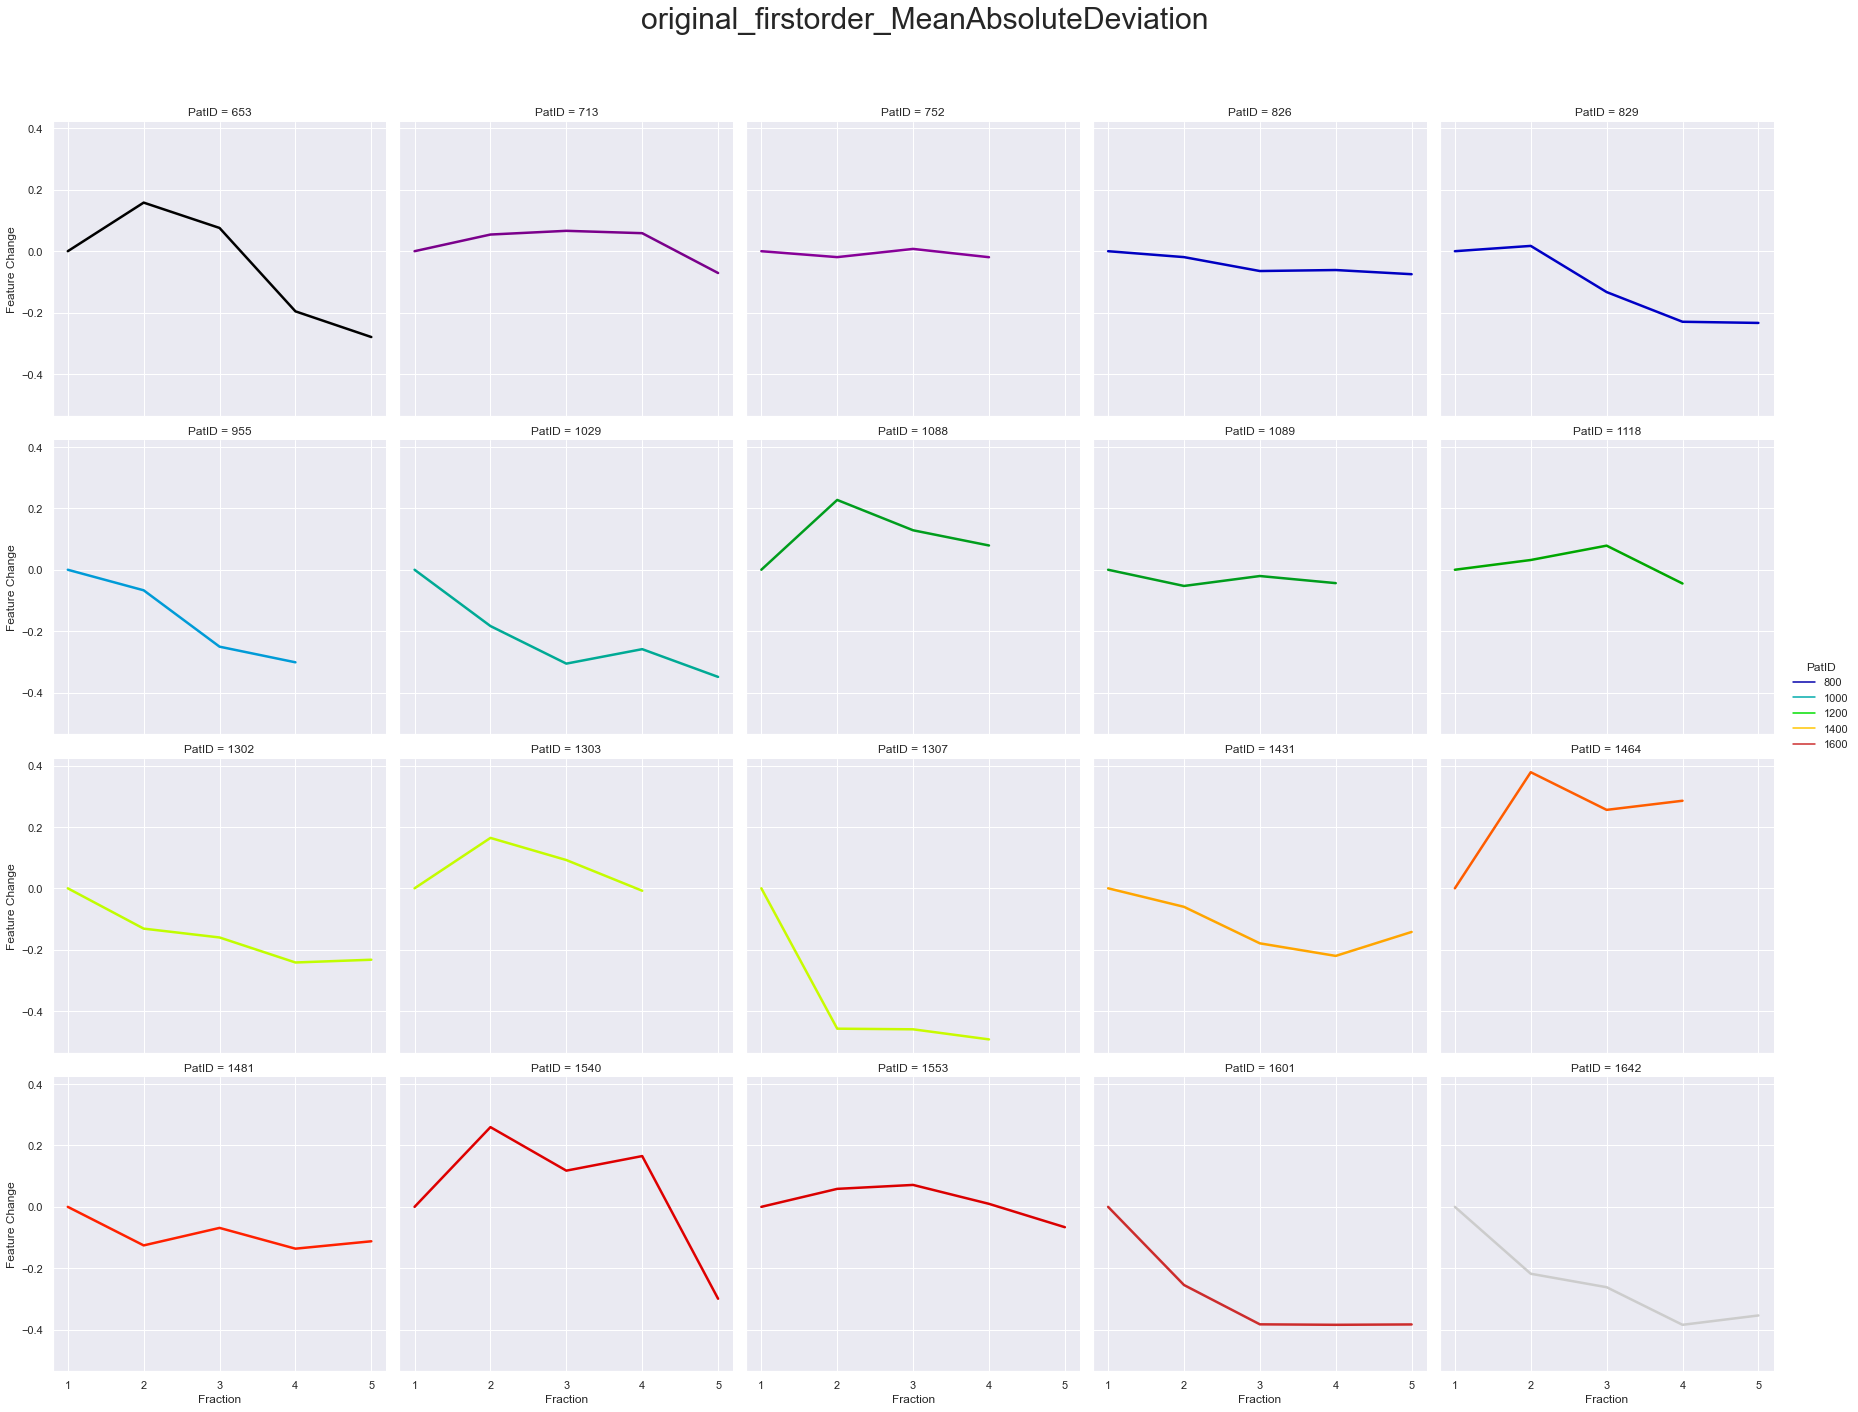

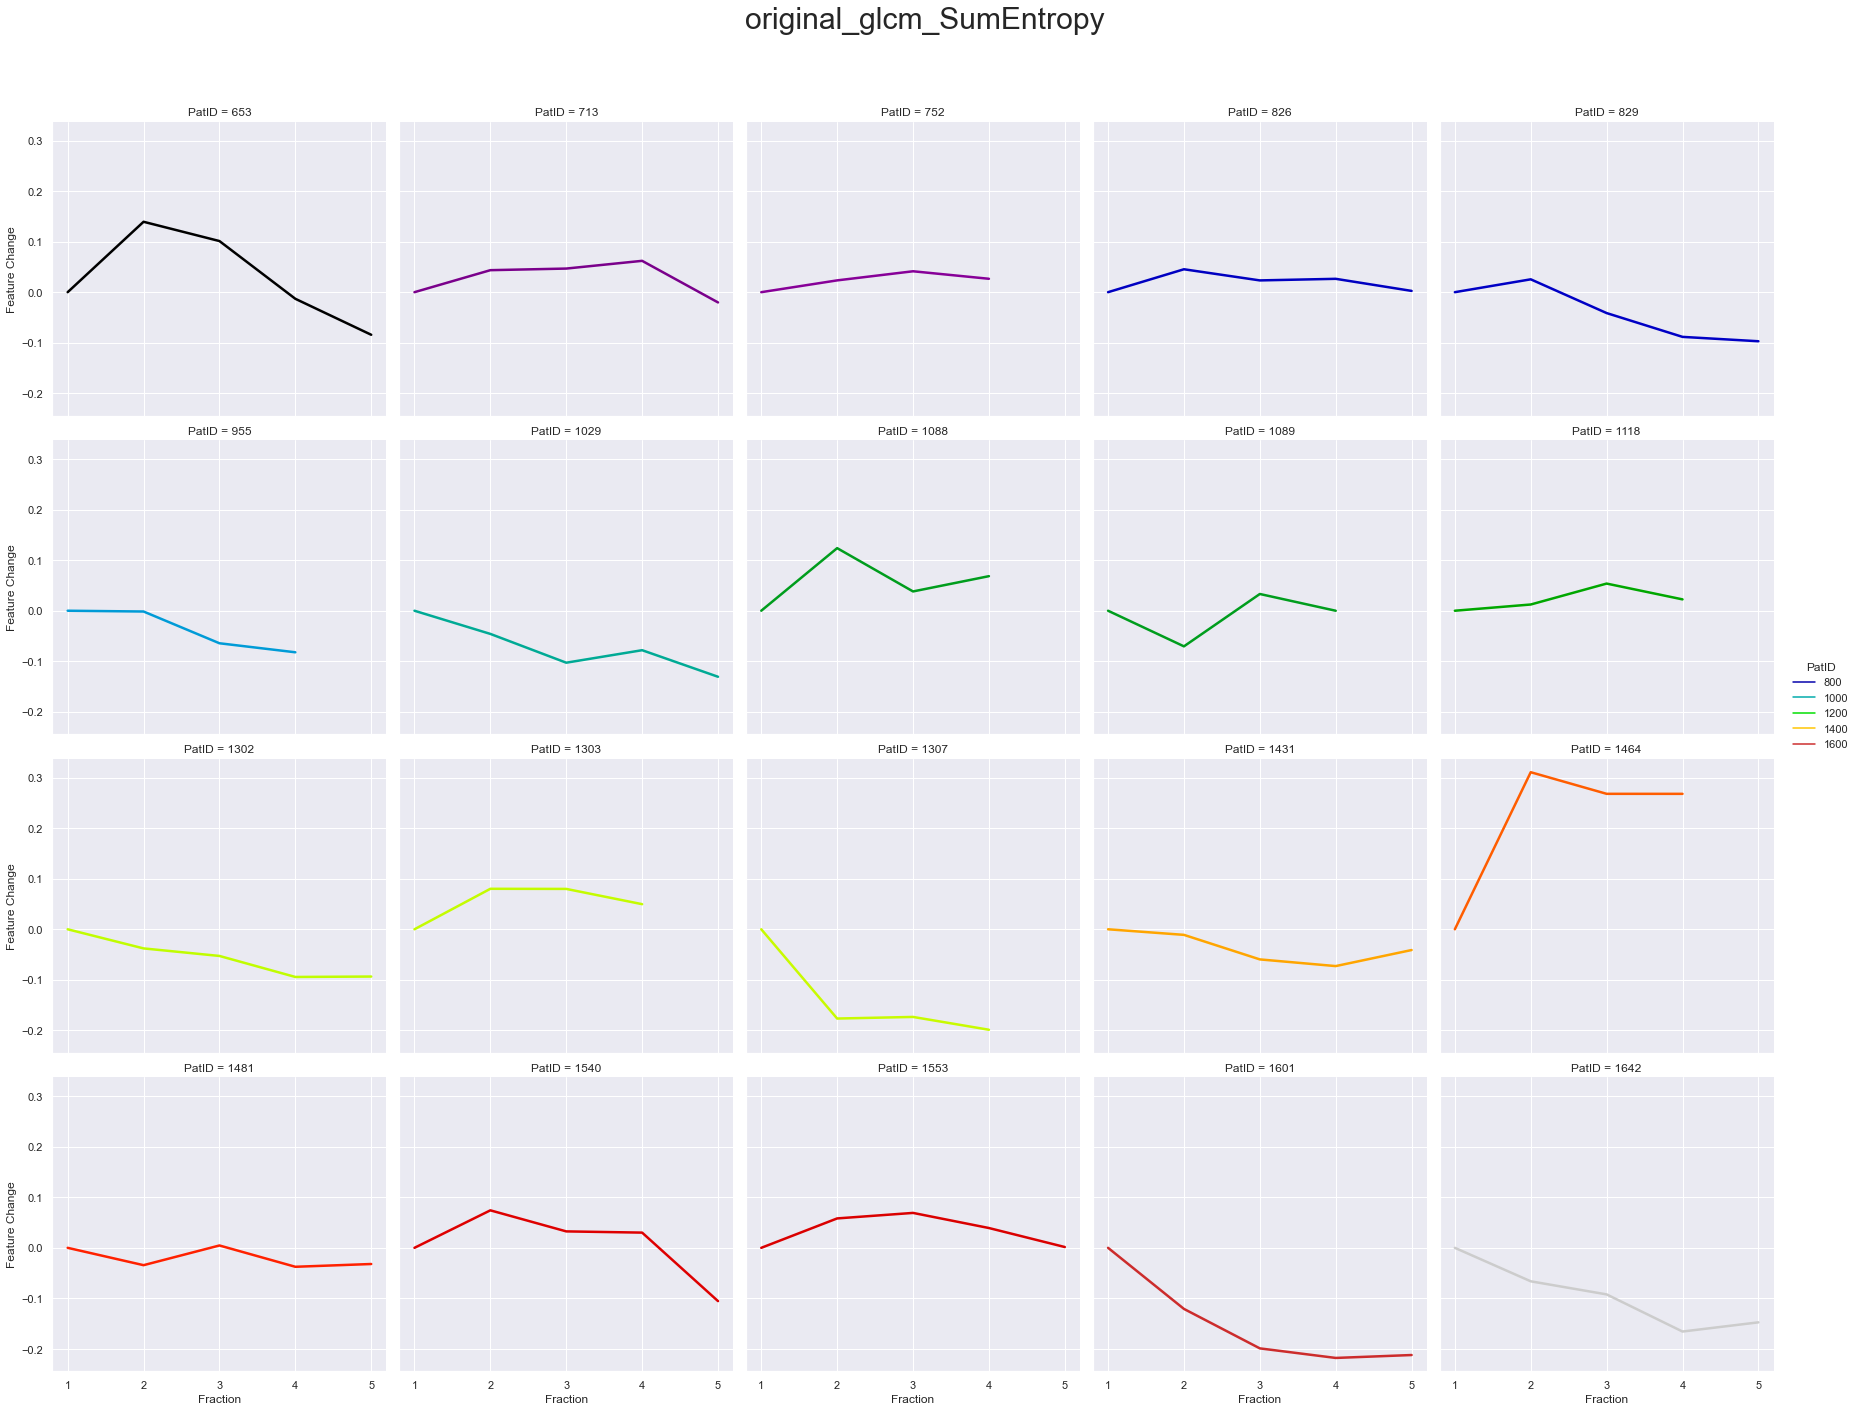

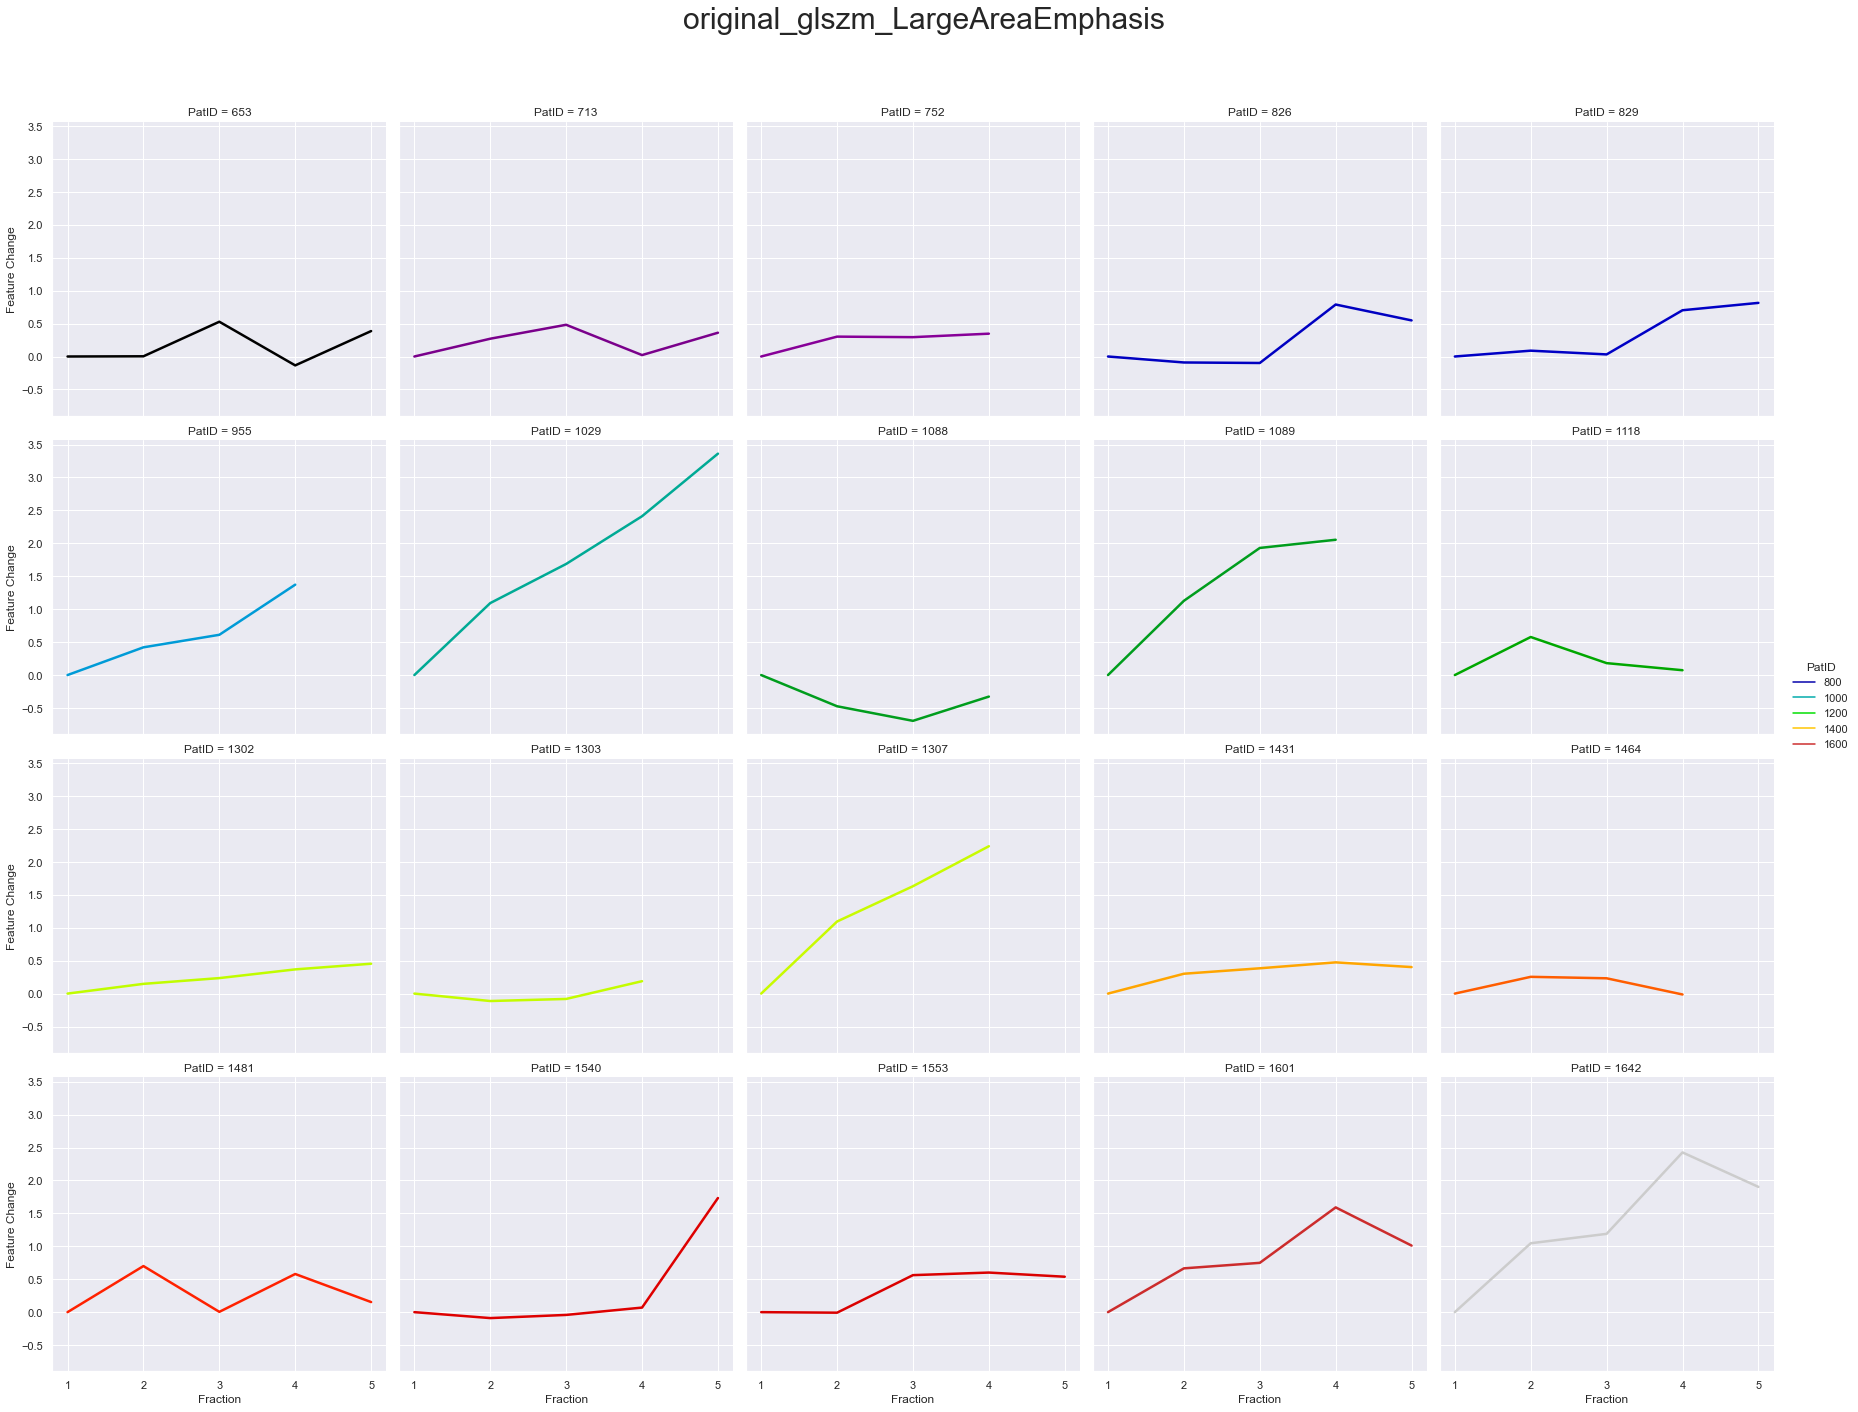

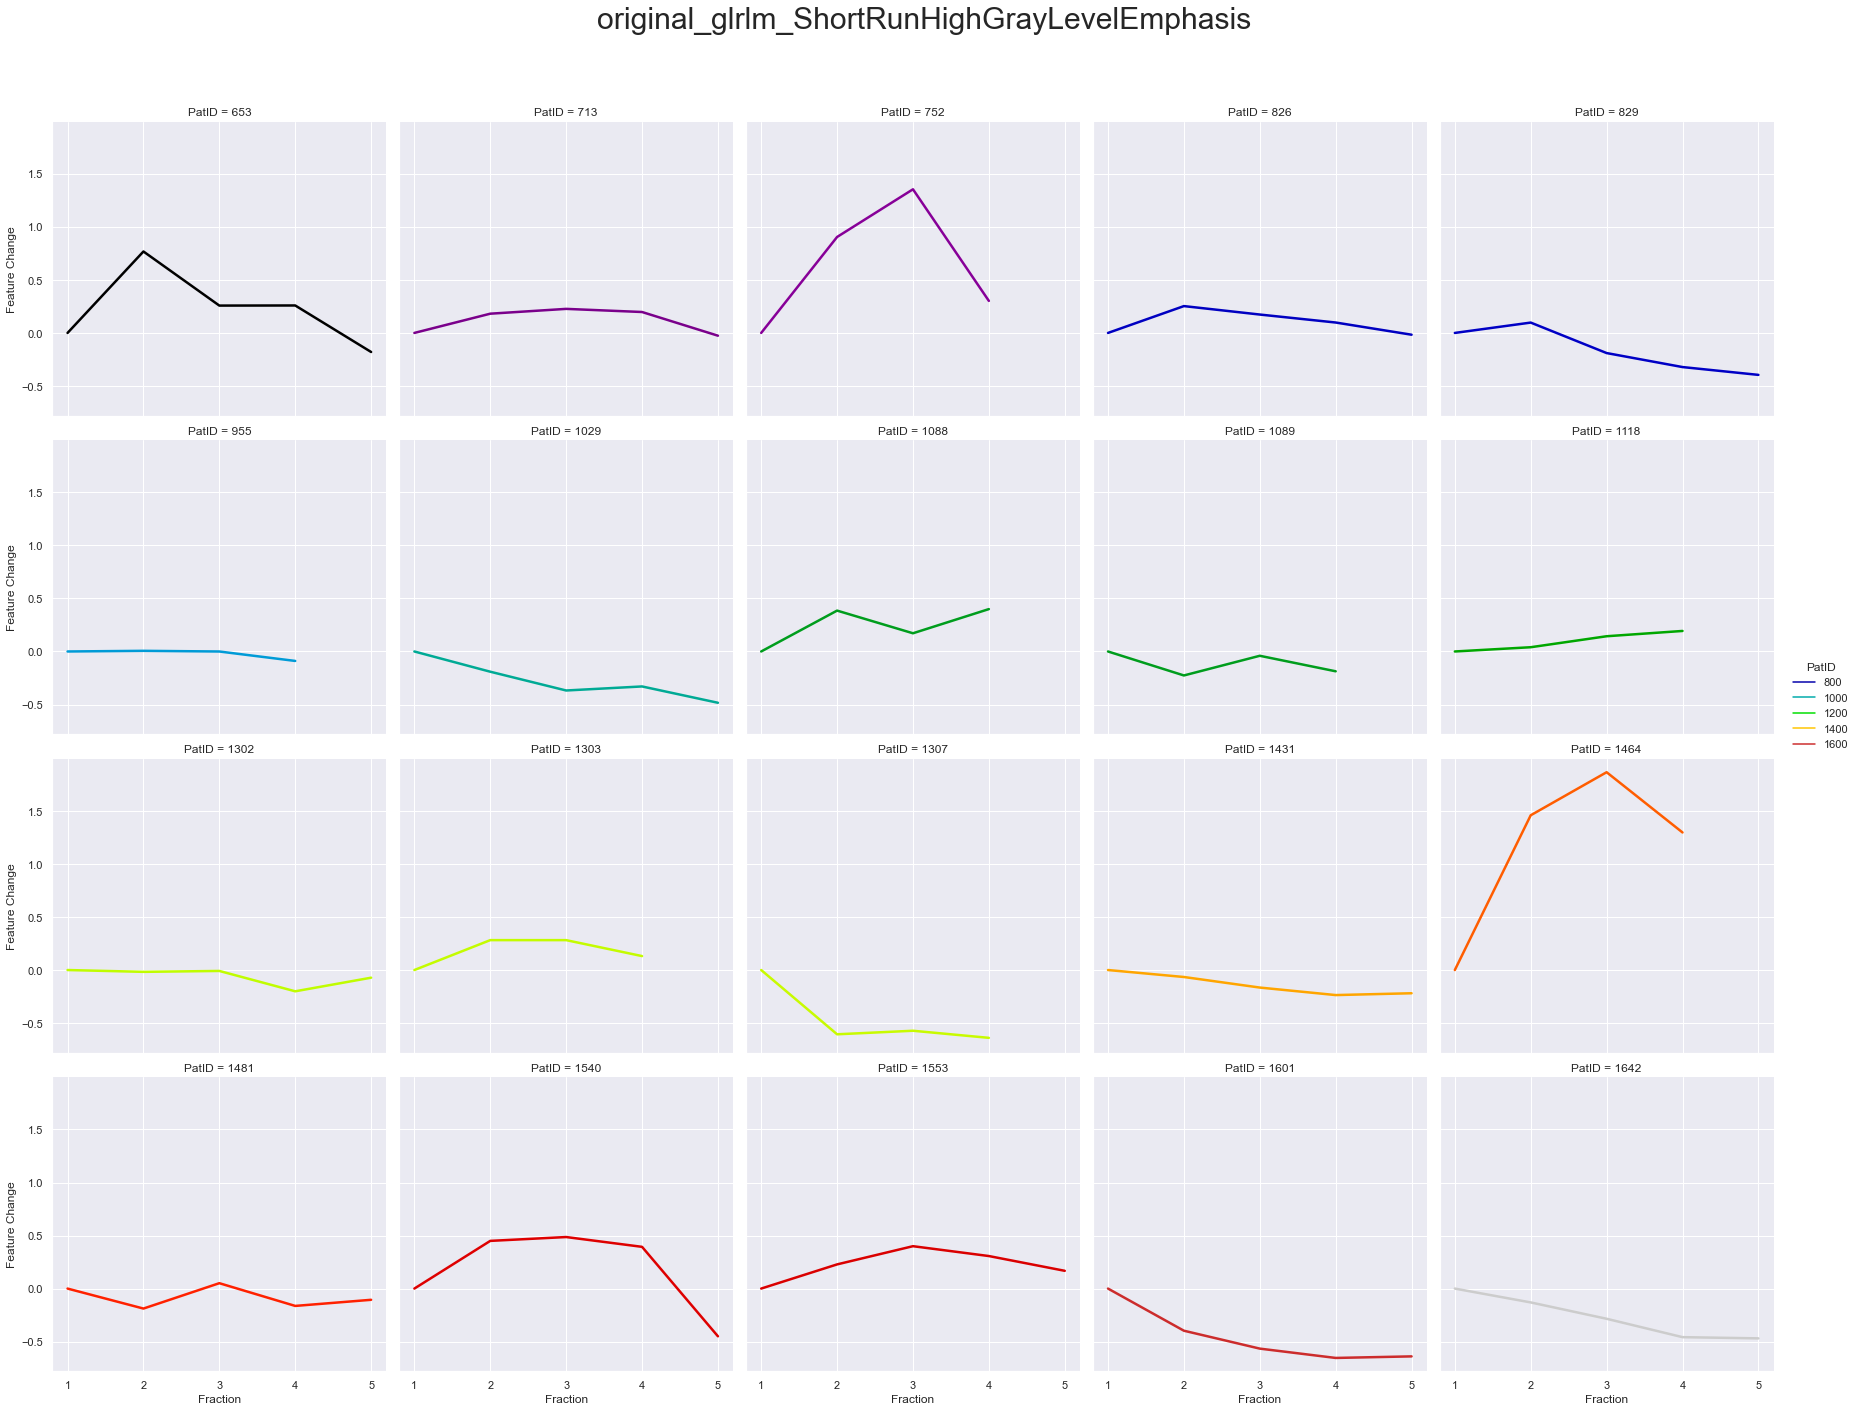

In [22]:
import os
import pandas as pd

csv_dir = "E:\\Aaron\\ProstateMRL\\Data\\Paper1\\Longitudinal\\Clustering\\Labels\\"
csv_files = os.listdir(csv_dir)
df_all = pd.DataFrame()
# open all csv files in the directory
for file in csv_files:
    # read in and append to df
    df = pd.read_csv(csv_dir + file)
    df_all = df_all.append(df)

df_all = df_all.sort_values(by=['PatID', 'Fraction'])
df_all.to_csv("E:\\Aaron\\ProstateMRL\\Data\\Paper1\\Longitudinal\\Clustering\\ClusterValsLabels.csv", index=False)
# rescale feature values based on value at Fraction 1 for each feature

df_all["Selected"] = df_all["Feature"].isin(fts_s)

for f in fts_s:
    df_f = df_all.query('Feature == @f')
    g = sns.relplot(data=df_f.query('Selected == True'), x="Fraction", y="FeatureChange",
                    hue="PatID", col="PatID", col_wrap=5, kind="line", ci=None, palette="nipy_spectral", linewidth=2.5)
    # for ax in g.axes:
    #     sns.lineplot(data=df_all.query('Selected == False'), x="Fraction", y="FeatureChange", 
    #                 color = "0.7", linewidth=2.5,
    #                 ci=None, ax=ax, legend=False,
    #                 alpha=0.5)
    g.set_axis_labels("Fraction", "Feature Change")
    # change title to feature name
    g.fig.suptitle(f, fontsize=30)
    g.fig.subplots_adjust(top=0.9)
    g.set(xticks=[1,2,3,4,5])
    g.set_xticklabels([1,2,3,4,5])
    # g = sns.relplot(data=df_all.query('Selected == False'), x="Fraction", y="FeatureChange", kind="line", color = "0.7", linewidth=2.5, ci=None)
